# Submitted By: SANTOSHI PATNAIK( DS-2306)

# Project. 8: Rainfall Weather Forecasting

## Project Description:
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


#### Dataset Description:
Number of columns: 23


-> Date  - The date of observation
-> Location  -The common name of the location of the weather station
-> MinTemp  -The minimum temperature in degrees celsius
-> MaxTemp -The maximum temperature in degrees celsius
-> Rainfall  -The amount of rainfall recorded for the day in mm
-> Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
-> Sunshine  -The number of hours of bright sunshine in the day.
-> WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
-> WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
-> WindDir9am -Direction of the wind at 9am
-> WindDir3pm -Direction of the wind at 3pm
-> WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
-> WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
-> Humidity9am -Humidity (percent) at 9am
-> Humidity3pm -Humidity (percent) at 3pm
-> Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
-> Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
-> Cloud9am - Fraction of sky obscured by cloud at 9am. 
-> Cloud3pm -Fraction of sky obscured by cloud 
-> Temp9am-Temperature (degrees C) at 9am
-> Temp3pm -Temperature (degrees C) at 3pm
-> RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
-> RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Dataset Link-  
•https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv
•https://github.com/dsrscientist/dataset3



In [1]:
import pandas as pd                              # importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df_rain=pd.read_csv('weatherAUS.csv')
df_rain

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

## EDA

In [3]:
df_rain.shape

(8425, 23)

In [4]:
df_rain.duplicated().sum()

1663

In [5]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

#### Comments:
-> most of the columns are of float datatype and some of columns are of "object" data type
-> the data set contains total 8425 rows 23 columns.. out of which 21 input variables and 2 target variable "Rain Tomorrow","Rainfall"

In [6]:
df_rain.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

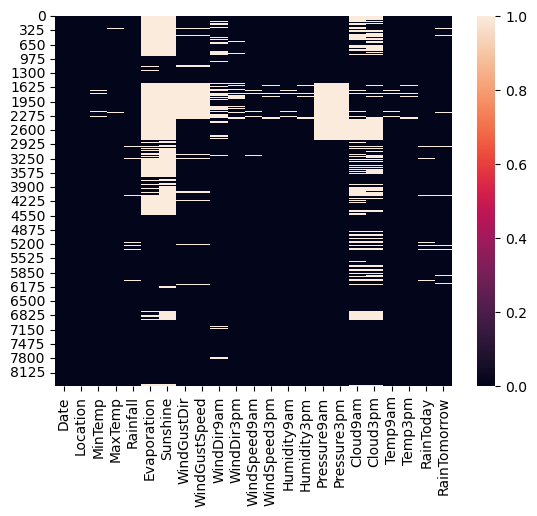

In [7]:
## Visualizing through heatmap:
sns.heatmap(df_rain.isnull())

#### Comments:
we can fill the null values by mean or mode of the values according to numerical or categorical data

In [8]:
df_rain['MinTemp']=df_rain['MinTemp'].fillna(df_rain['MinTemp'].mean())
df_rain['MaxTemp']=df_rain['MinTemp'].fillna(df_rain['MaxTemp'].mean())
df_rain['Rainfall']=df_rain['Rainfall'].fillna(df_rain['Rainfall'].mean())
df_rain['Evaporation']=df_rain['Evaporation'].fillna(df_rain['Evaporation'].mean())
df_rain['Sunshine']=df_rain['Sunshine'].fillna(df_rain['Sunshine'].mean())
df_rain['WindGustSpeed']=df_rain['WindGustSpeed'].fillna(df_rain['WindGustSpeed'].mean())
df_rain['WindSpeed9am']=df_rain['WindSpeed9am'].fillna(df_rain['WindSpeed9am'].mean())
df_rain['WindSpeed3pm']=df_rain['WindSpeed3pm'].fillna(df_rain['WindSpeed3pm'].mean())
df_rain['Humidity9am']=df_rain['Humidity9am'].fillna(df_rain['Humidity9am'].mean())
df_rain['Humidity3pm']=df_rain['Humidity3pm'].fillna(df_rain['Humidity3pm'].mean())
df_rain['Pressure9am']=df_rain['Pressure9am'].fillna(df_rain['Pressure9am'].mean())
df_rain['Pressure3pm']=df_rain['Pressure3pm'].fillna(df_rain['Pressure3pm'].mean())
df_rain['Cloud9am']=df_rain['Cloud9am'].fillna(df_rain['Cloud9am'].mean())
df_rain['Cloud3pm']=df_rain['Cloud3pm'].fillna(df_rain['Cloud3pm'].mean())
df_rain['Temp9am']=df_rain['Temp9am'].fillna(df_rain['Temp9am'].mean())
df_rain['Temp3pm']=df_rain['Temp3pm'].fillna(df_rain['Temp3pm'].mean())

In [9]:
df_rain['RainToday']=df_rain['RainToday'].fillna(df_rain['RainToday'].mode()[0])
df_rain['RainTomorrow']=df_rain['RainTomorrow'].fillna(df_rain['RainTomorrow'].mode()[0])
df_rain['WindDir9am'] = df_rain['WindDir9am'].fillna(df_rain['WindDir9am'].mode()[0])
df_rain['WindGustDir'] =df_rain['WindGustDir'].fillna(df_rain['WindGustDir'].mode()[0])
df_rain['WindDir3pm'] = df_rain['WindDir3pm'].fillna(df_rain['WindDir3pm'].mode()[0])

In [10]:
df_rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

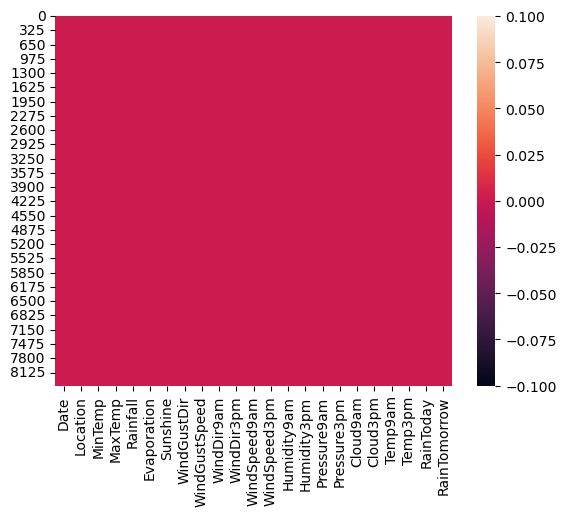

In [11]:
## Visualizing through Heatmap:
sns.heatmap(df_rain.isnull())

#### Now all the NAN values are replaced... so we can proceed 

In [12]:
#### Target Variable1: 
df_rain['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

##### The first target variable "RainTomorrow" contains only two category.. so we can consider it as a Binary Classification problem.. and apply classification model to it

In [13]:
### Target Variable 2:
df_rain['Rainfall'].value_counts()


0.000000      5299
0.200000       406
2.805913       240
0.400000       177
0.600000       116
              ... 
61.200000        1
128.000000       1
90.000000        1
34.400000        1
40.000000        1
Name: Rainfall, Length: 251, dtype: int64

##### Here the target variable 2 "Rainfall" contains continues data.. so we can apply regression model for the prediction

## Statistical Description:

In [14]:
df_rain.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     13.193305    13.193305     2.805913     5.389395     7.632205   
std       5.379488     5.379488    10.309308     3.852004     2.825451   
min      -2.000000    -2.000000     0.000000     0.000000     0.000000   
25%       9.300000     9.300000     0.000000     4.000000     7.632205   
50%      13.200000    13.200000     0.000000     5.389395     7.632205   
75%      17.300000    17.300000     1.400000     5.389395     8.900000   
max      28.500000    28.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    8425.000000   8425.000000   8425.000000  8425.000000  8425.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        13.776101     10.128579      9.704759    16.774231    18.311894   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        31.000000      6.000000     11.000000    56.000000    39.000000   
50%        40.174469     13.000000     19.000000    68.000000    51.000000   
75%        48.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.275759     6.217451     2.429205     2.299419     5.608301   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1014.000000  1011.400000     3.000000     3.000000    13.800000   
50%    1017.640233  1015.236075     4.566622     4.503183    17.762015   
75%    1021.300000  1018.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8425.000000  
mean     22.442934  
std       5.945849  
min       7.300000  
25%      18.100000  
50%      22.000000  
75%      26.300000  
max      44.100000

### Comments:
-> The count of all the columns are same which shows there is no missing value
-> There is a considerable gap between 75% and the max value which shows the presence of Outliers in the dataset
-> in target varibale "Rainfall" the mean is greater than median (50%) which shows data is right skewed
-?in "min temp","max temp","Evaporation","sunshine","Windgustspeed" etc the data is normally distributed

# Data Visualization:


## Univariate Analysis:


###### Analyzing the target Column:

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


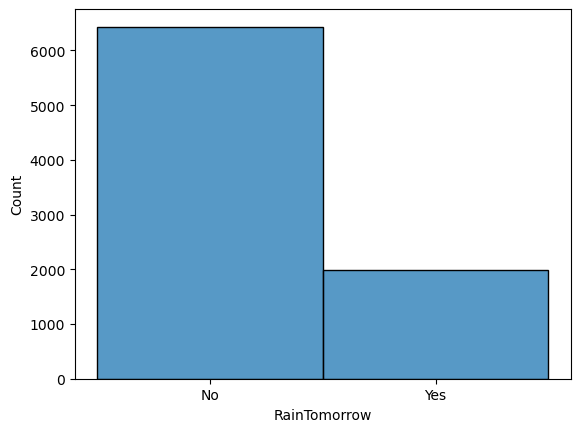

In [15]:
#visualizing Rainfall Tomorrow
p=sns.histplot(x='RainTomorrow',data=df_rain)
print(df_rain['RainTomorrow'].value_counts())

#### observations:
-> Chances of No Rain Tomorrow is greater than the chances of Raining.

No     6435
Yes    1990
Name: RainToday, dtype: int64


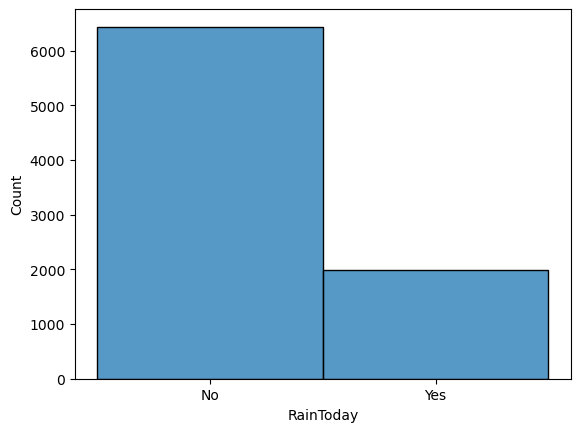

In [16]:
#visualizing Rainfall Today
p=sns.histplot(x='RainToday',data=df_rain)
print(df_rain['RainToday'].value_counts())

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


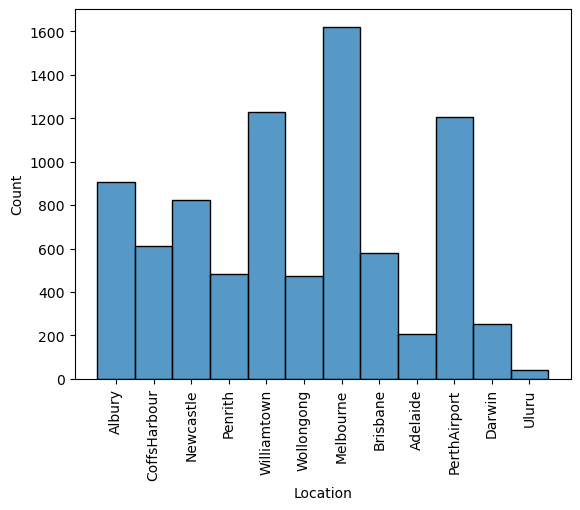

In [17]:
#visualizing Location
p=sns.histplot(x='Location',data=df_rain)
plt.xticks(rotation=90)
print(df_rain['Location'].value_counts())

#### Observations:
-> "Melbourne" city has recorded highest Rain Fall in Past.. so Chances of rain Tomorrow in this city is Higher
-> After Melbourne, Williamtown and PerthAirport has highest rainfall recorded
-> "Uluru" Location has the Lowest value of rain fall recorded in the past years

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


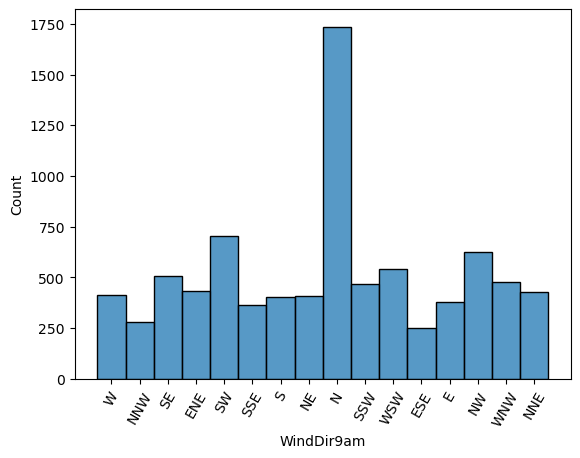

In [18]:
#visualizing WindDir9am
p=sns.histplot(x='WindDir9am',data=df_rain)
plt.xticks(rotation=60)
print(df_rain['WindDir9am'].value_counts())

#### Observations:
-> At 9Am highest Wind Flow is From "North" direction.. 
-> From other direction it is normal

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


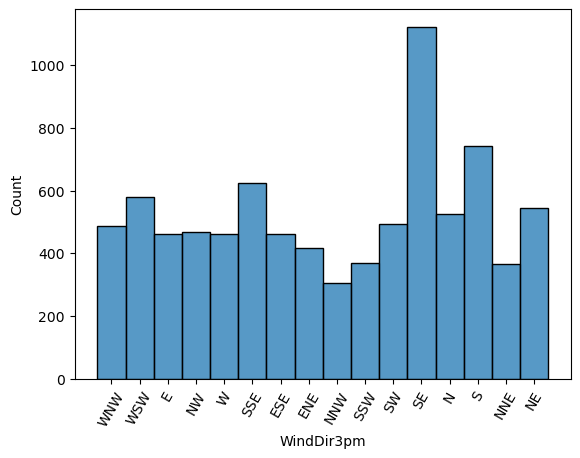

In [19]:
#visualizing WindDir3pm
p=sns.histplot(x='WindDir3pm',data=df_rain)
plt.xticks(rotation=60)
print(df_rain['WindDir3pm'].value_counts())

#### Observations:
-> Highest Windflow from "SouthEast" direction is recorded at 3pm
->The from other direction it is almost uniform

### BiVariate Analysis:

<function matplotlib.pyplot.show(close=None, block=None)>

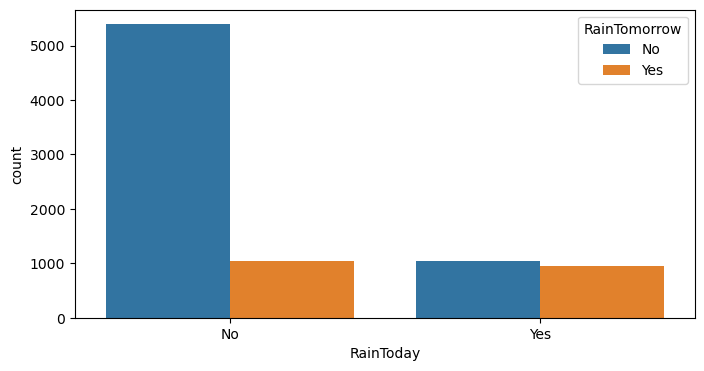

In [20]:
# RainToday vs RainTomorrow
plt.figure(figsize=(8,4))
sns.countplot(x="RainToday", hue="RainTomorrow", data=df_rain)
plt.show

#### Observations:
-> from the above plot we can observe that "Today's Rainfall" has almost no impact on "Tomorrow Rain fall"
-> we can see The chances for Raintomorrow is 50-50

<function matplotlib.pyplot.show(close=None, block=None)>

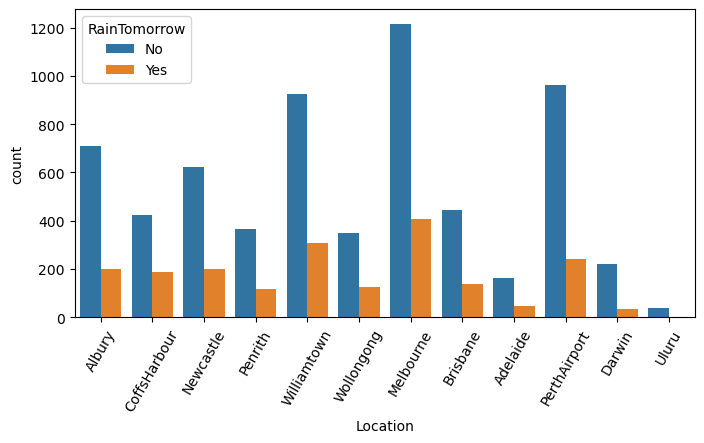

In [21]:
# Location vs RainTomorrow
plt.figure(figsize=(8,4))
sns.countplot(x="Location", hue="RainTomorrow", data=df_rain)
plt.xticks(rotation=60)
plt.show


#### Rain fall chances for tomorrow is higher in locations like (1.Melbourne, 2.Williamtown, 3.PerthAirport, 4.Newcastle) etc

<function matplotlib.pyplot.show(close=None, block=None)>

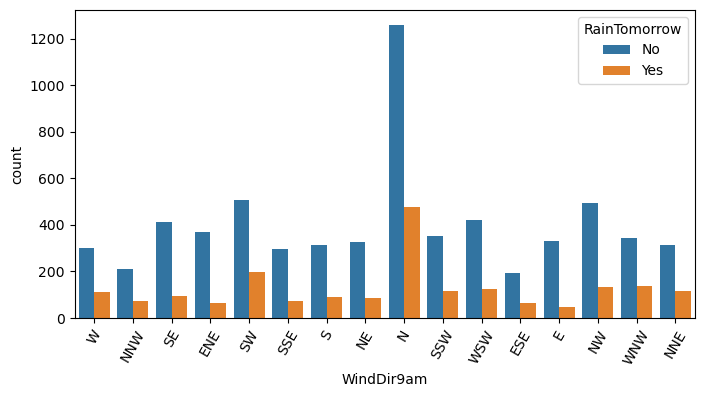

In [22]:
# WindDir9am vs RainTomorrow
plt.figure(figsize=(8,4))
sns.countplot(x="WindDir9am", hue="RainTomorrow", data=df_rain)
plt.xticks(rotation=60)
plt.show

#### we can say Wind Direction is predicting more towards Rainfall Toorrow, in North direction WindFlow is more , and chances of rain is also higer

<function matplotlib.pyplot.show(close=None, block=None)>

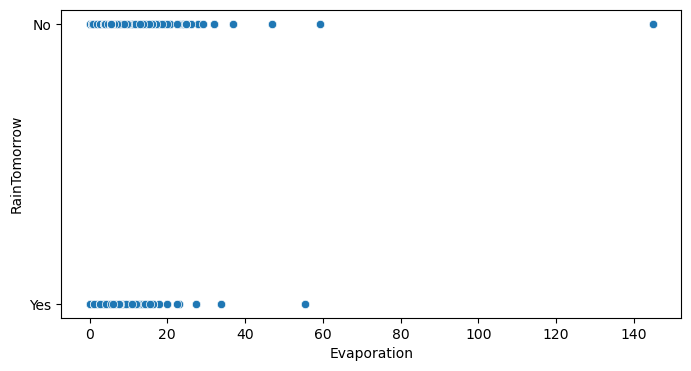

In [23]:
# Evaporation vs RainTomorrow
plt.figure(figsize=(8,4))
sns.scatterplot(x="Evaporation", y="RainTomorrow", data=df_rain)
plt.show

## Pairplot

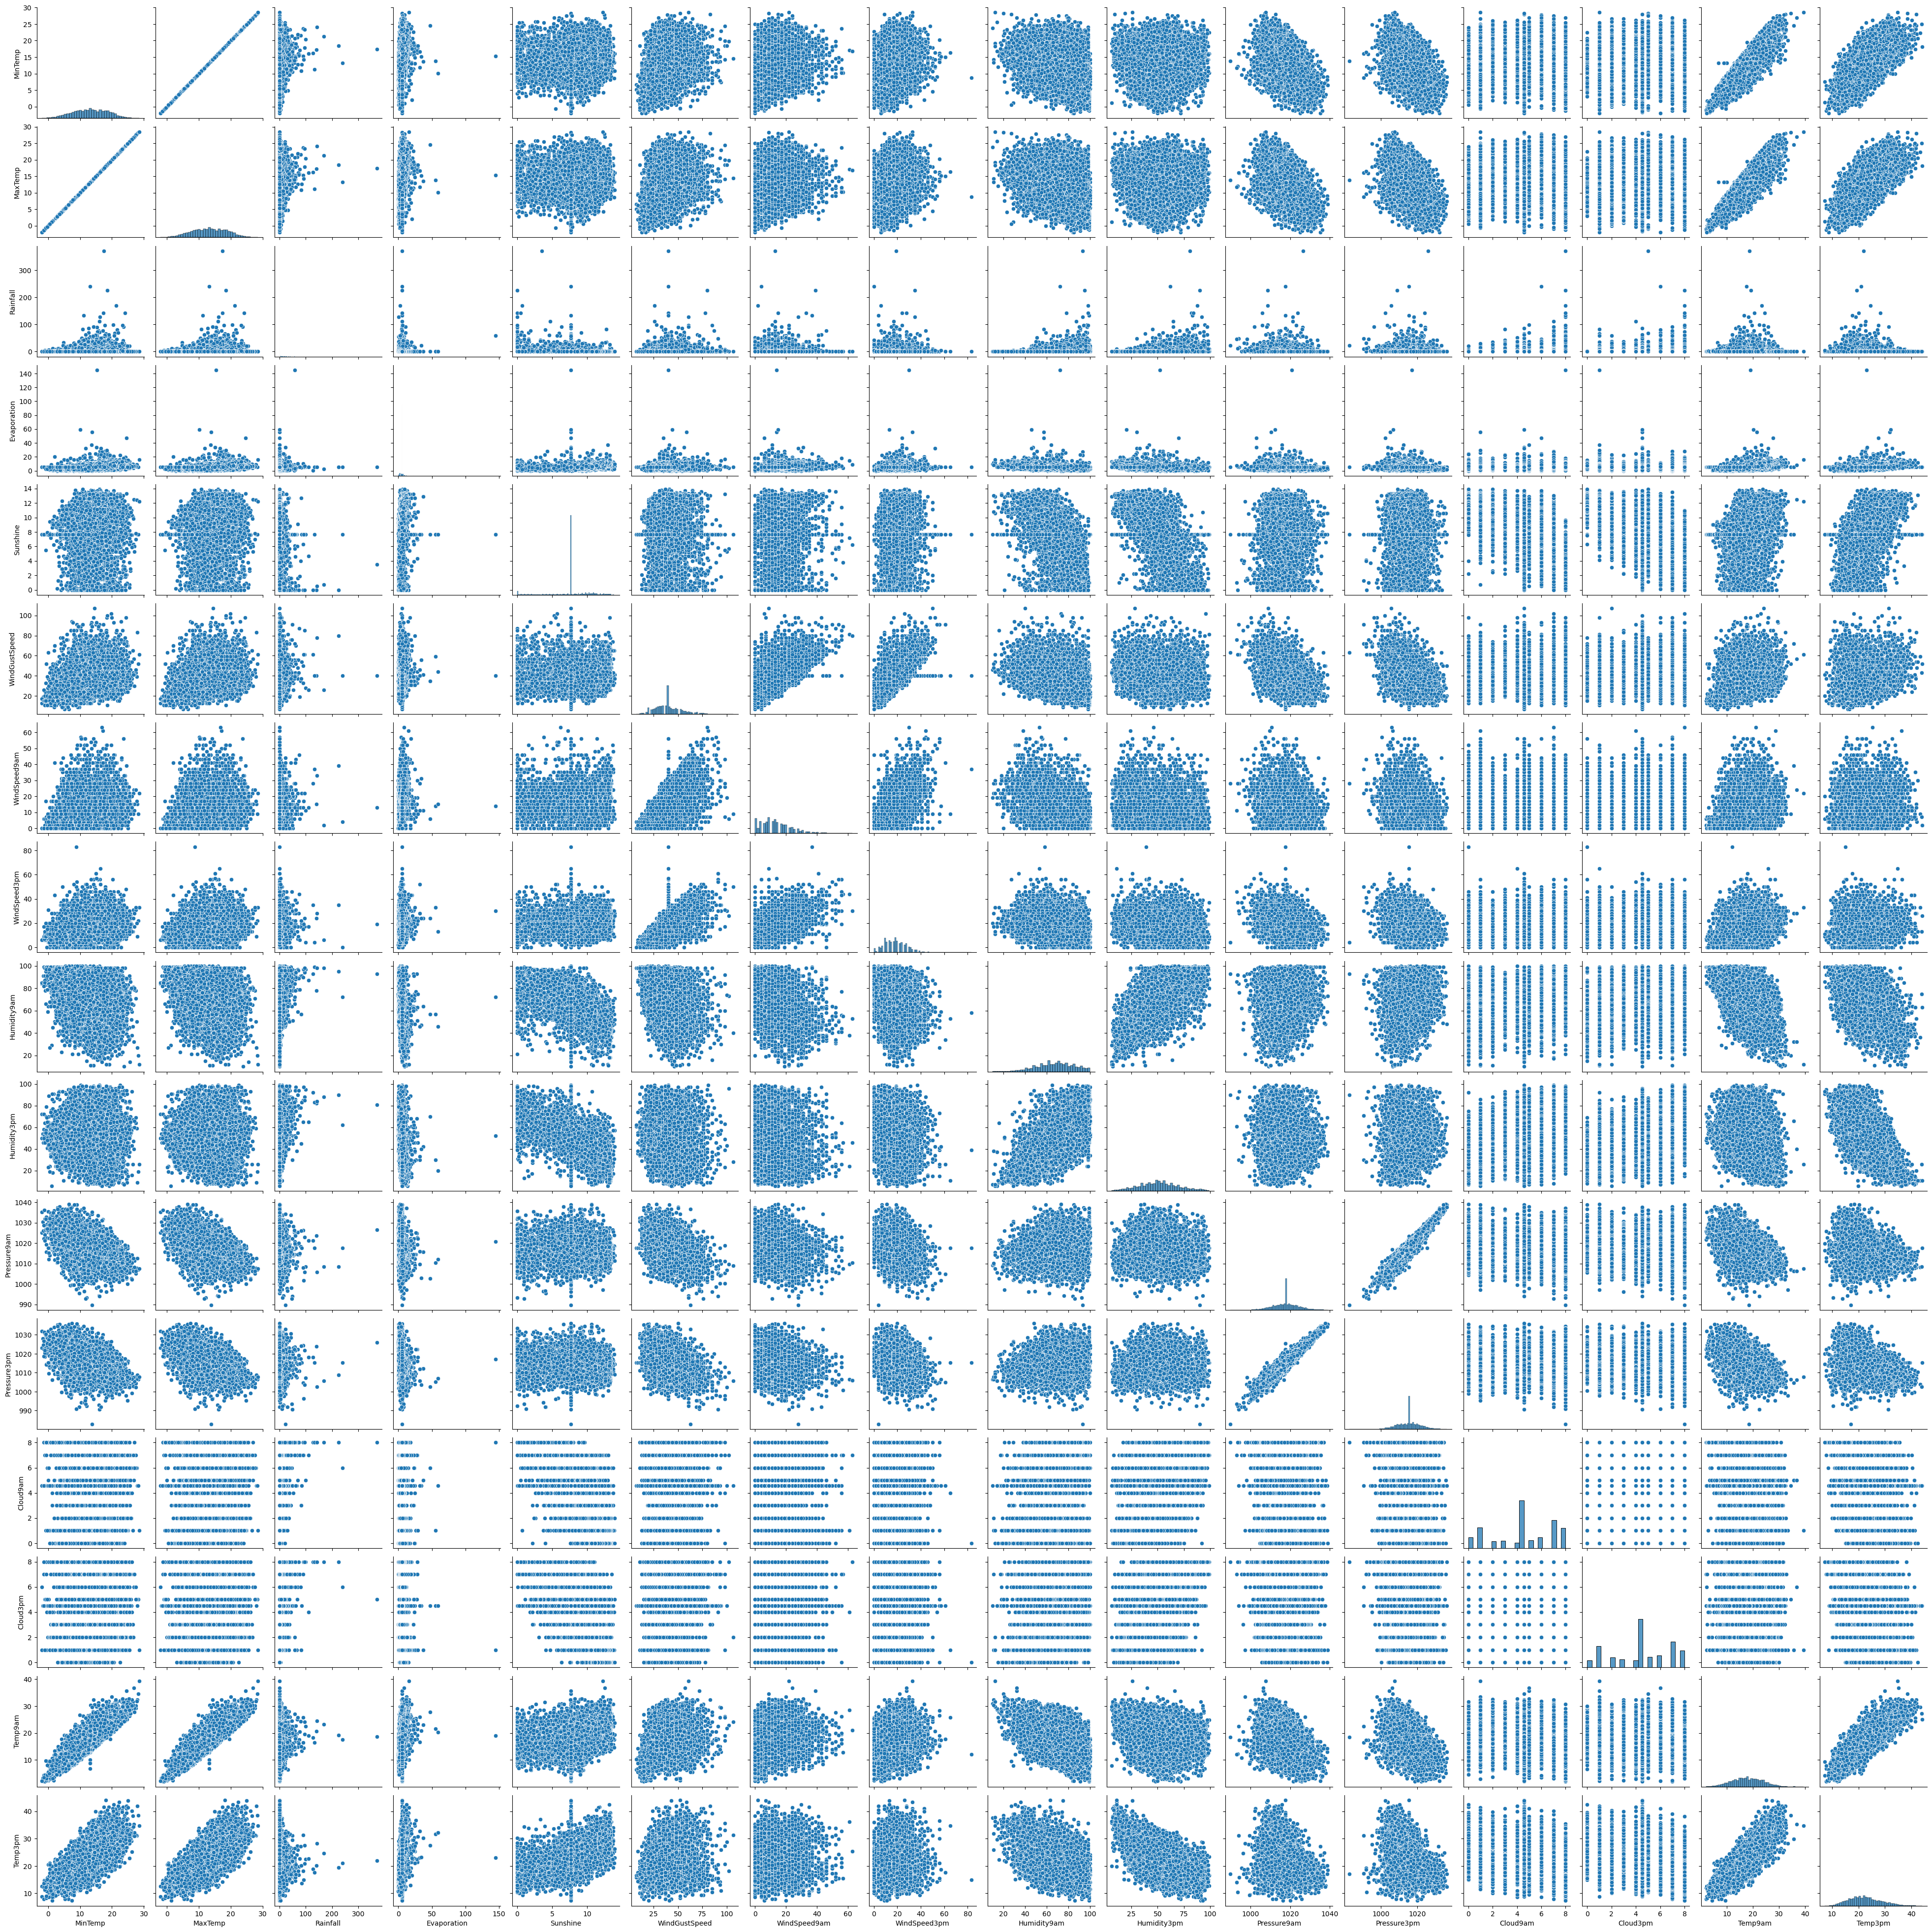

In [24]:
sns.pairplot(df_rain)

# Feature Engineering:

In [25]:
# Encoding Categorical Columns:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df_rain.columns:
    if df_rain[i].dtypes=="object":
        df_rain[i]=OE.fit_transform(df_rain[i].values.reshape(-1,1))    
df_rain       

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        0.0       1.0     13.4     13.4       0.6     5.389395  7.632205   
1        1.0       1.0      7.4      7.4       0.0     5.389395  7.632205   
2        2.0       1.0     12.9     12.9       0.0     5.389395  7.632205   
3        3.0       1.0      9.2      9.2       0.0     5.389395  7.632205   
4        4.0       1.0     17.5     17.5       1.0     5.389395  7.632205   
...      ...       ...      ...      ...       ...          ...       ...   
8420  2999.0       9.0      2.8      2.8       0.0     5.389395  7.632205   
8421  3000.0       9.0      3.6      3.6       0.0     5.389395  7.632205   
8422  3001.0       9.0      5.4      5.4       0.0     5.389395  7.632205   
8423  3002.0       9.0      7.8      7.8       0.0     5.389395  7.632205   
8424  3003.0       9.0     14.9     14.9       0.0     5.389395  7.632205   

      WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0            13.0      44.000000        13.0  ...         71.0         22.0   
1            14.0      44.000000         6.0  ...         44.0         25.0   
2            15.0      46.000000        13.0  ...         38.0         30.0   
3             4.0      24.000000         9.0  ...         45.0         16.0   
4            13.0      41.000000         1.0  ...         82.0         33.0   
...           ...            ...         ...  ...          ...          ...   
8420          0.0      31.000000         9.0  ...         51.0         24.0   
8421          6.0      22.000000         9.0  ...         56.0         21.0   
8422          3.0      37.000000         9.0  ...         53.0         24.0   
8423          9.0      28.000000        10.0  ...         51.0         24.0   
8424          3.0      40.174469         2.0  ...         62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1  8.000000  4.503183     16.9     21.8   
1          1010.6       1007.8  4.566622  4.503183     17.2     24.3   
2          1007.6       1008.7  4.566622  2.000000     21.0     23.2   
3          1017.6       1012.8  4.566622  4.503183     18.1     26.5   
4          1010.8       1006.0  7.000000  8.000000     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3  4.566622  4.503183     10.1     22.4   
8421       1023.5       1019.1  4.566622  4.503183     10.9     24.5   
8422       1021.0       1016.8  4.566622  4.503183     12.5     26.1   
8423       1019.4       1016.5  3.000000  2.000000     15.1     26.0   
8424       1020.2       1017.9  8.000000  8.000000     15.0     20.9   

      RainToday  RainTomorrow  
0           0.0           0.0  
1           0.0           0.0  
2           0.0           0.0  
3           0.0           0.0  
4           0.0           0.0  
...         ...           ...  
8420        0.0           0.0  
8421        0.0           0.0  
8422        0.0           0.0  
8423        0.0           0.0  
8424        0.0           0.0  

[8425 rows x 23 columns]

## Outlier Detection:

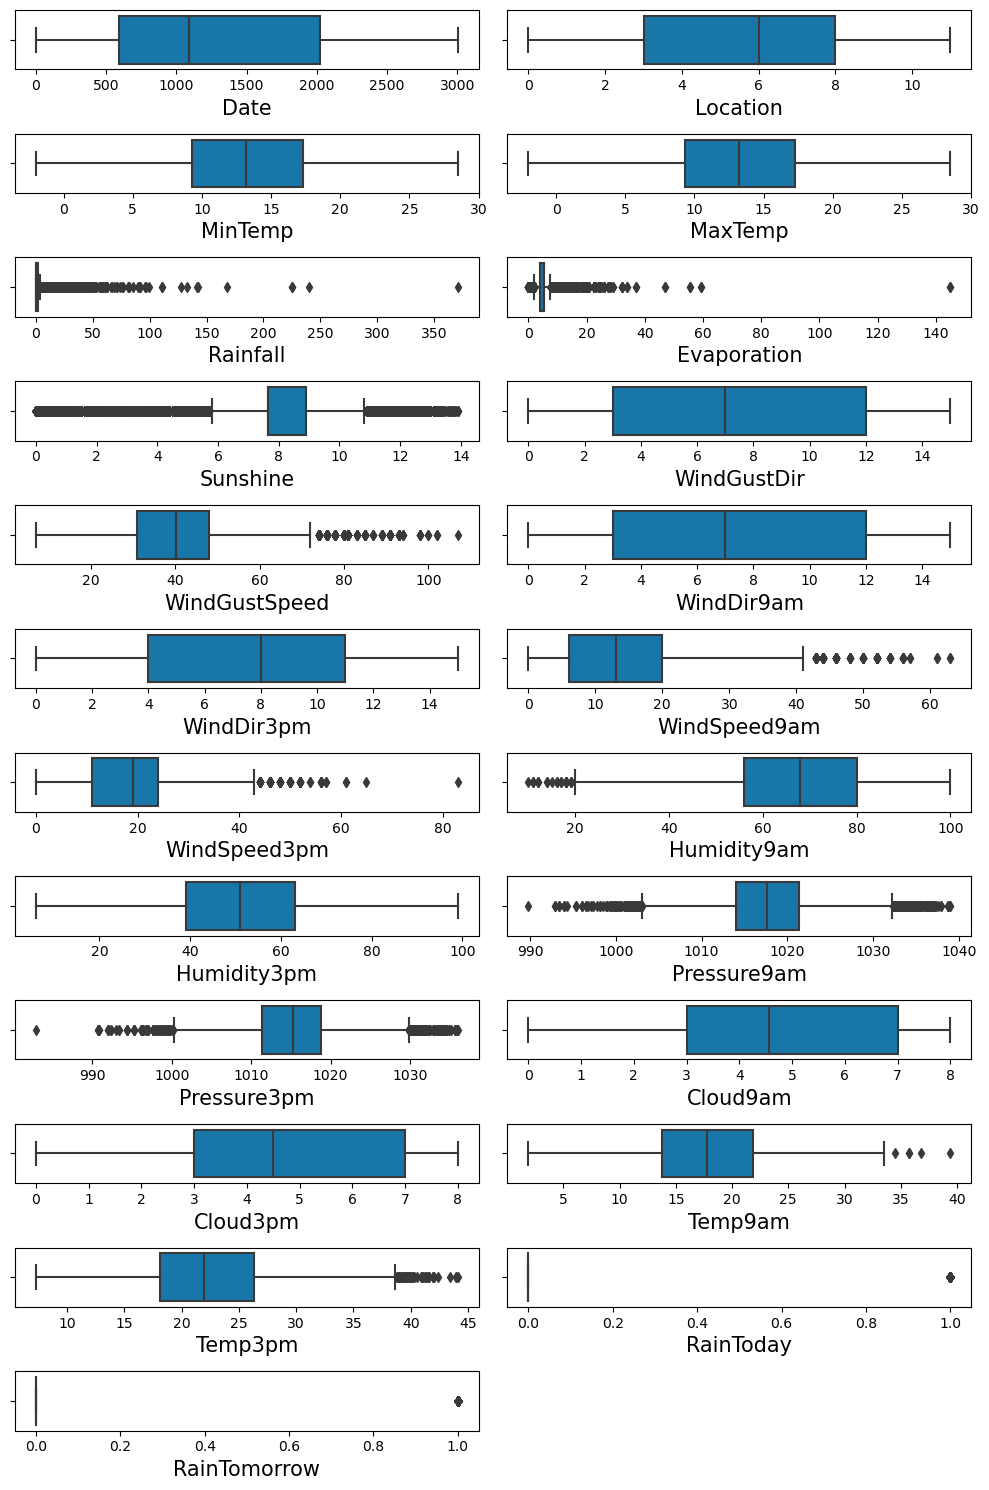

In [26]:
# checking for outliers
plt.figure(figsize=(10,15),facecolor="white")
plotnum=1
for i in df_rain.columns:
    if plotnum<=24:
        p=plt.subplot(12,2,plotnum)
        sns.boxplot(df_rain[i],palette='winter_r')
        plt.xlabel(i,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
        plotnum+=1
plt.tight_layout()    

In [27]:
#removing outliers:
#z-score method:
from scipy.stats import zscore
out_features=df_rain[['Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
z=np.abs(zscore(out_features))
z

Evaporation      Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     2.305893e-16  1.257472e-15       0.277710      0.607461      0.563297   
1     2.305893e-16  1.257472e-15       0.277710      0.972321      0.357200   
2     2.305893e-16  1.257472e-15       0.422897      0.508725      0.769394   
3     2.305893e-16  1.257472e-15       1.174166      0.281166      0.982428   
4     2.305893e-16  1.257472e-15       0.059928      0.676112      0.151104   
...            ...           ...            ...           ...           ...   
8420  2.305893e-16  1.257472e-15       0.666009      0.083694      0.776331   
8421  2.305893e-16  1.257472e-15       1.319354      0.083694      0.982428   
8422  2.305893e-16  1.257472e-15       0.230447      0.478639      0.982428   
8423  2.305893e-16  1.257472e-15       0.883791      0.083694      1.188525   
8424  2.305893e-16  1.257472e-15       0.000000      0.311252      0.158041   

      Humidity9am  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0        0.189439     1.584003     1.308665  0.153712  0.108138  
1        1.420268     1.121880     1.196072  0.100217  0.312348  
2        1.777981     1.599939     1.051309  0.577390  0.127334  
3        1.360650     0.006411     0.391836  0.060269  0.682376  
4        0.845246     1.090010     1.485596  0.006773  1.220599  
...           ...          ...          ...       ...       ...  
8420     1.002937     1.109058     0.814518  1.366273  0.007221  
8421     0.704843     0.933770     0.621501  1.223619  0.345987  
8422     0.883699     0.535388     0.251553  0.938310  0.615099  
8423     1.002937     0.280424     0.203299  0.474684  0.598279  
8424     0.347130     0.407906     0.428485  0.492516  0.259513  

[8425 rows x 10 columns]

In [28]:
#threshold=3
np.where(z>3)

(array([  12,   12,   44,   52,   52,   60,   61,   62,   62,   67,   68,
         123,  267,  296,  381,  381,  405,  406,  407,  563,  568,  568,
         569,  602,  683,  683,  748,  748,  980,  980, 1189, 1535, 1587,
        1644, 1665, 1898, 1903, 1945, 2016, 2028, 2043, 2074, 2186, 2219,
        2219, 2230, 2500, 2505, 2527, 2827, 2835, 2849, 2855, 2859, 2863,
        2869, 2877, 2883, 2891, 2897, 2905, 2911, 2919, 2925, 2933, 2939,
        2947, 2953, 2961, 2967, 2975, 2989, 3051, 3058, 3059, 3059, 3060,
        3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089,
        3099, 3099, 3101, 3141, 3150, 3153, 3157, 3164, 3167, 3172, 3172,
        3178, 3185, 3206, 3212, 3212, 3213, 3221, 3227, 3234, 3248, 3260,
        3271, 3278, 3291, 3302, 3303, 3449, 3449, 3449, 3450, 3450, 3458,
        3471, 3491, 3557, 3602, 3603, 3617, 3679, 3687, 3701, 3707, 3711,
        3715, 3721, 3729, 3735, 3743, 3749, 3757, 3763, 3771, 3777, 3785,
        3791, 3799, 3805, 3813, 3819, 

In [29]:
# we have to removethese rows which have outliers:
df1_rain=df_rain[(z<3).all(axis=1)]
df1_rain.shape          # after removing outliers the data frame size

(8095, 23)

In [30]:
#originaldata frame size
df_rain.shape

(8425, 23)

In [31]:
#data loss percentage:
print("data loss percentage",((df_rain.shape[0]-df1_rain.shape[0])/df_rain.shape[0])*100)

data loss percentage 3.9169139465875373


###### The data loss percentage is affordable so we can proceed with z-score method

In [32]:
#checking for skewness present in the data:
df1_rain.skew()

Date              0.398651
Location         -0.035796
MinTemp          -0.094538
MaxTemp          -0.094538
Rainfall         13.897092
Evaporation       0.844939
Sunshine         -0.729992
WindGustDir       0.111452
WindGustSpeed     0.509079
WindDir9am        0.152240
WindDir3pm       -0.129575
WindSpeed9am      0.712369
WindSpeed3pm      0.301024
Humidity9am      -0.237214
Humidity3pm       0.125872
Pressure9am       0.024754
Pressure3pm       0.047523
Cloud9am         -0.364928
Cloud3pm         -0.273745
Temp9am          -0.038715
Temp3pm           0.341420
RainToday         1.232771
RainTomorrow      1.255370
dtype: float64

#### Comments:
-> Here we can see only the " Rainfall" column has highest skewness value of 13.89.. but as this one is the target variable so no transformation needed for this..
-> remaining  "raintomorrow" columns contains skewness value greater than one which are also target variable so no need of any transformation technique here
-> in RainToday column the skewness can be trasformed by scling technique which we will use furthur to scale the input variables

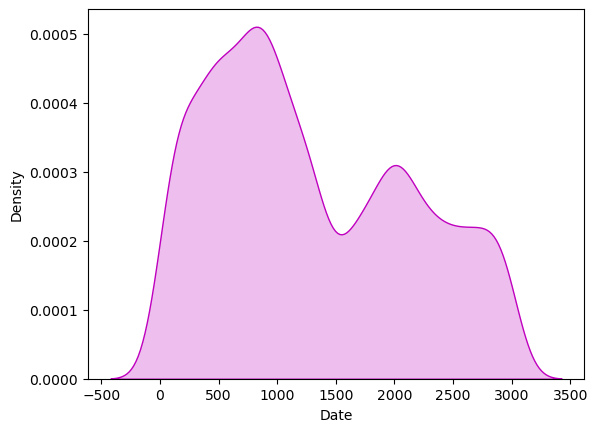

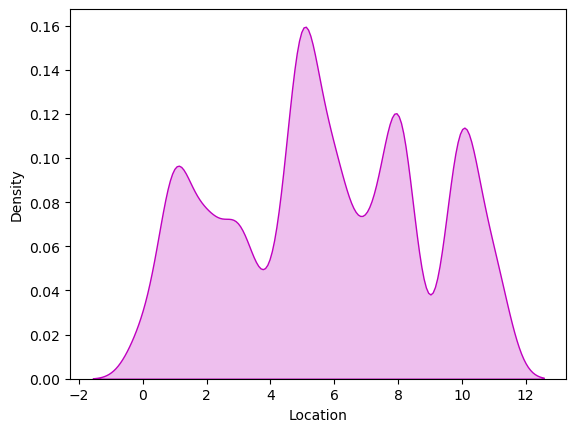

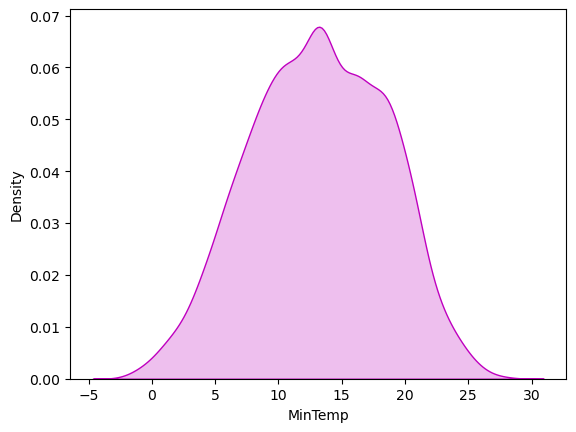

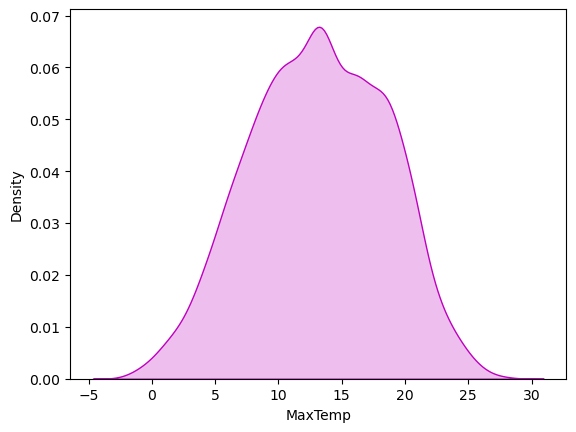

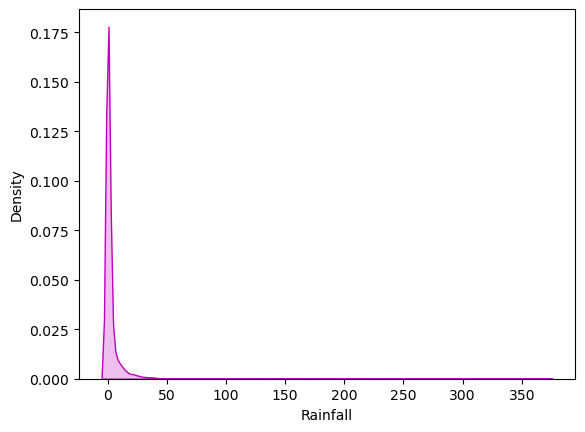

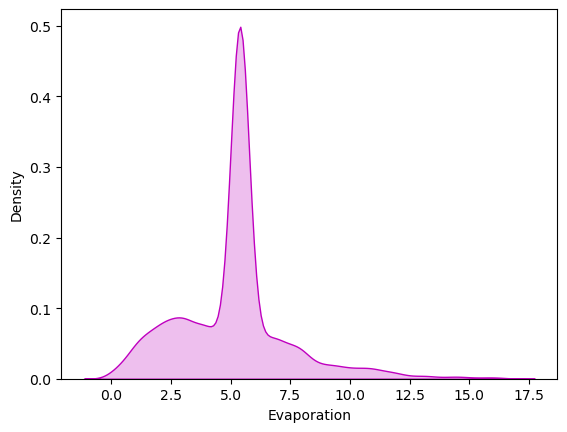

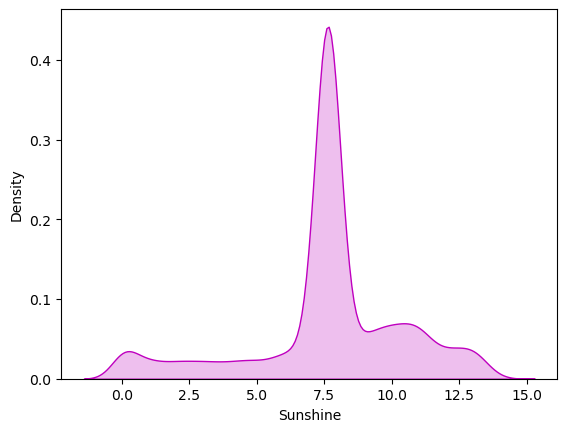

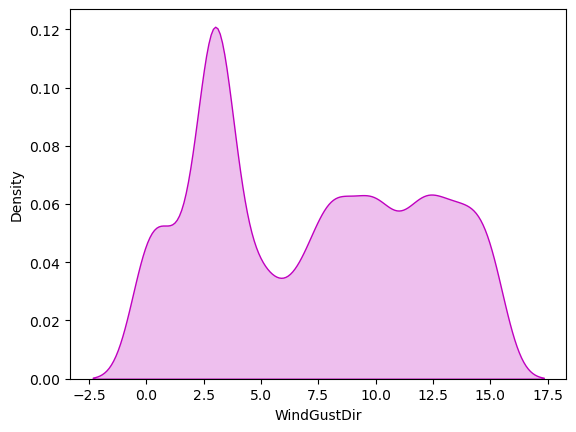

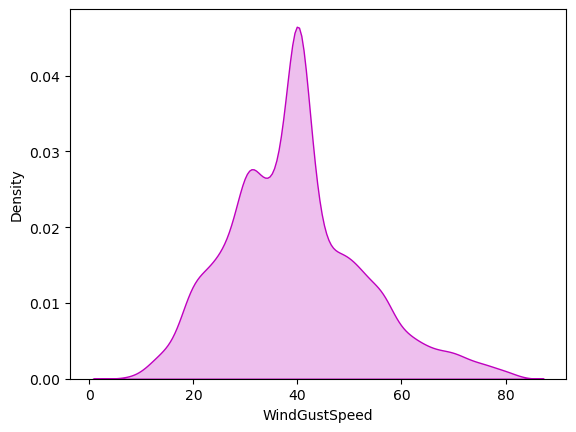

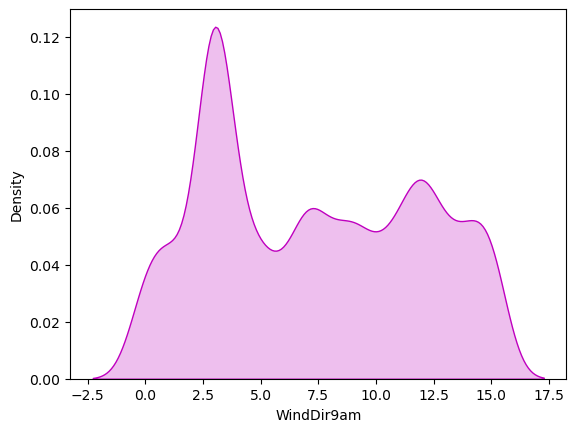

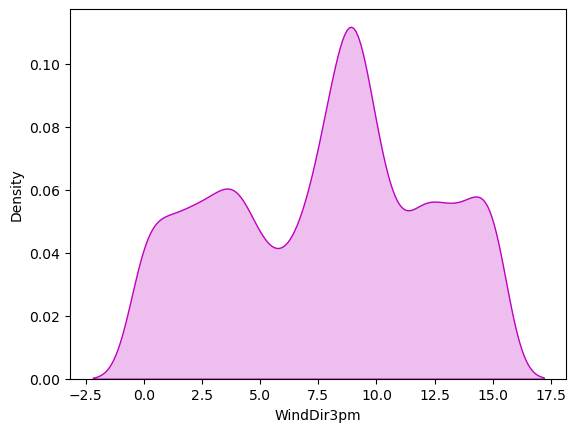

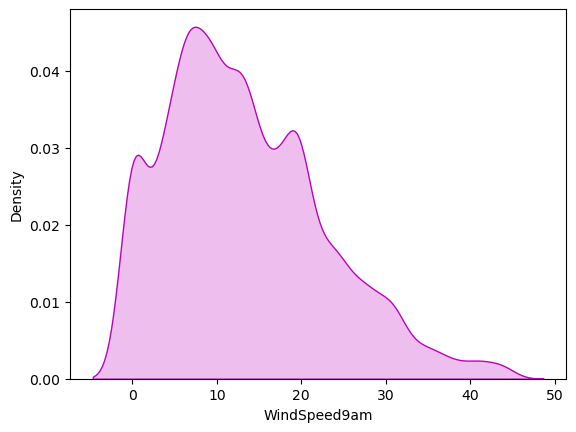

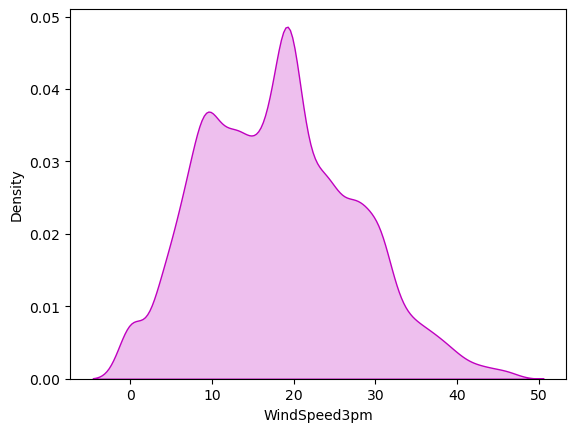

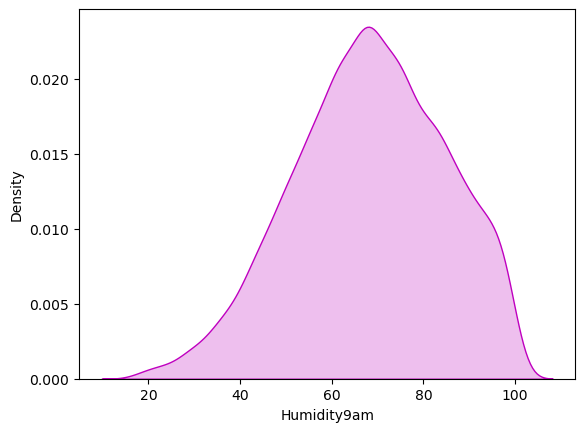

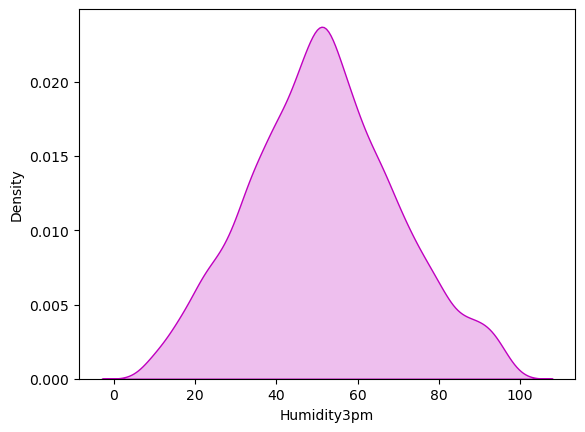

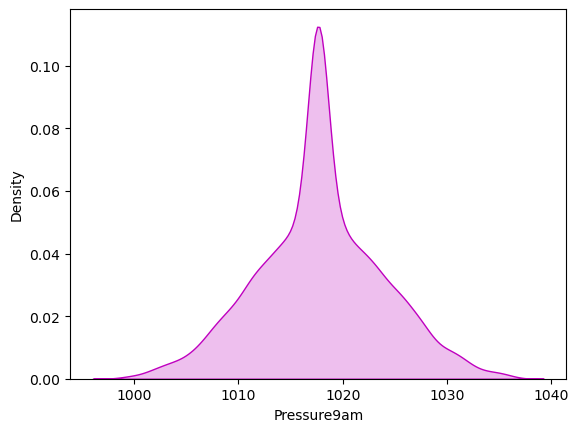

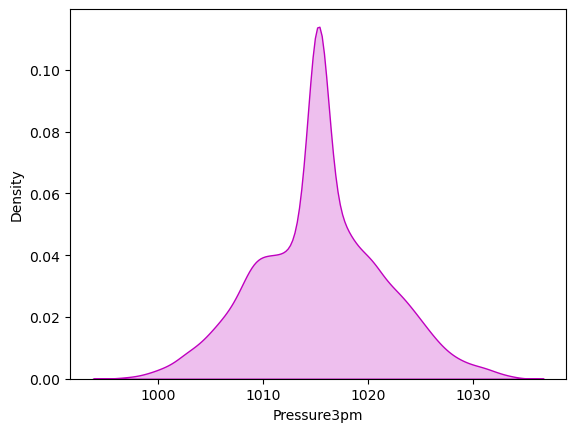

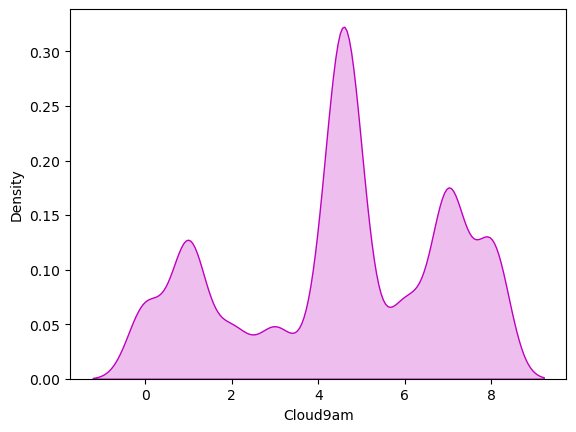

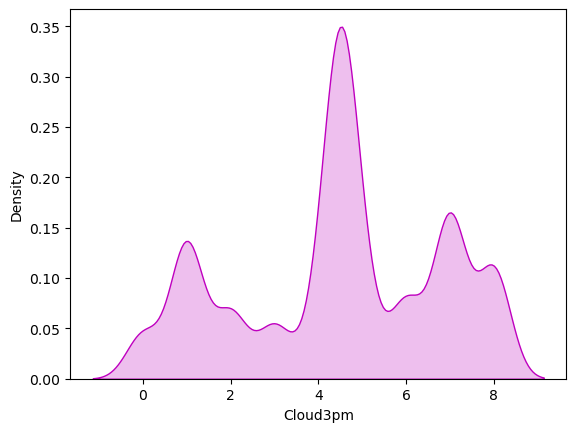

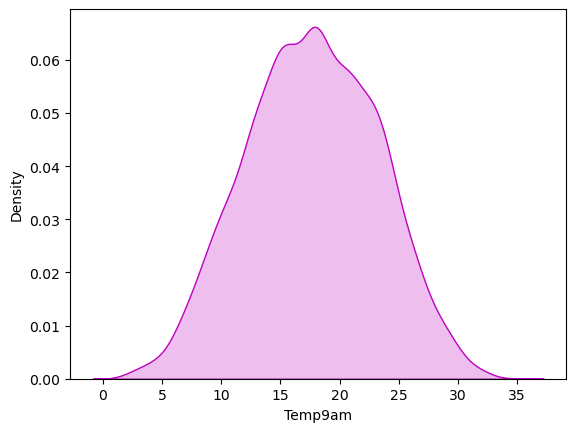

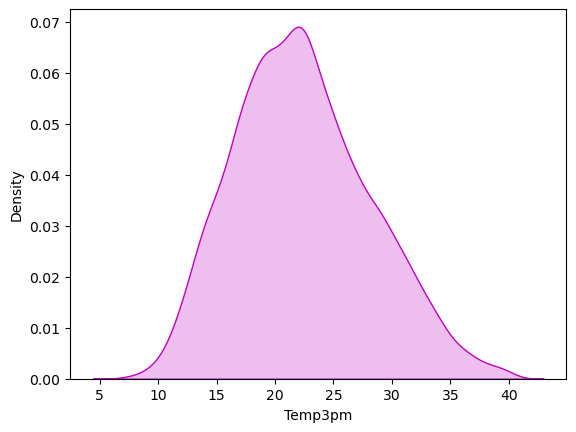

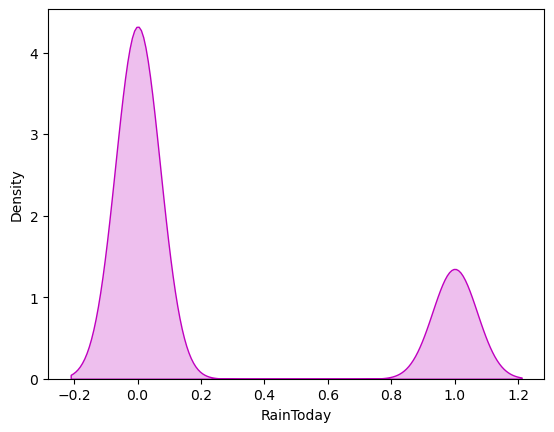

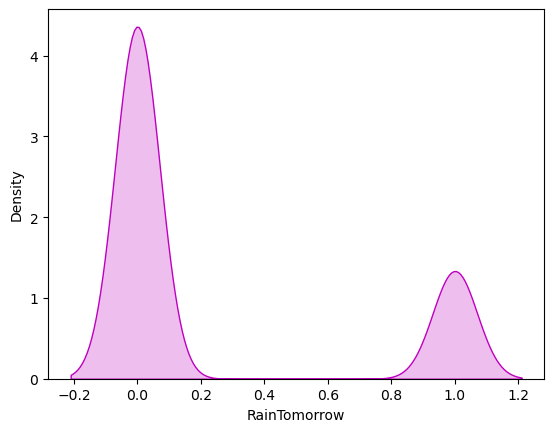

In [33]:
### Visualizing the spreading of data :
for i in df1_rain.columns:
    sns.distplot(df1_rain[i],color="m",kde_kws={"shade":True},hist=False)
    plt.show()

## Correlation Martix:

In [34]:
corr=df1_rain.corr()
corr

Date  Location   MinTemp   MaxTemp  Rainfall  Evaporation  \
Date           1.000000  0.471470  0.010188  0.010188  0.003159     0.118135   
Location       0.471470  1.000000  0.112020  0.112020  0.003112     0.132553   
MinTemp        0.010188  0.112020  1.000000  1.000000  0.090879     0.370858   
MaxTemp        0.010188  0.112020  1.000000  1.000000  0.090879     0.370858   
Rainfall       0.003159  0.003112  0.090879  0.090879  1.000000    -0.039825   
Evaporation    0.118135  0.132553  0.370858  0.370858 -0.039825     1.000000   
Sunshine       0.060218  0.053174  0.055313  0.055313 -0.167560     0.363056   
WindGustDir   -0.090176 -0.037417 -0.153312 -0.153312  0.036598    -0.120358   
WindGustSpeed -0.030513  0.243850  0.231050  0.231050  0.082620     0.199600   
WindDir9am    -0.028573 -0.038655 -0.043406 -0.043406  0.090789    -0.112451   
WindDir3pm    -0.004003 -0.028622 -0.155134 -0.155134  0.035329    -0.034938   
WindSpeed9am  -0.086670  0.236547  0.144742  0.144742  0.059333     0.139666   
WindSpeed3pm  -0.056885  0.231936  0.183462  0.183462  0.022985     0.104435   
Humidity9am    0.093217  0.003829 -0.117147 -0.117147  0.223853    -0.319535   
Humidity3pm   -0.036490  0.058170  0.097472  0.097472  0.234243    -0.229237   
Pressure9am    0.039711 -0.021382 -0.432528 -0.432528 -0.054897    -0.260710   
Pressure3pm    0.020935 -0.009228 -0.426595 -0.426595 -0.013731    -0.274448   
Cloud9am       0.005095  0.040491  0.096184  0.096184  0.182583    -0.112576   
Cloud3pm      -0.002545  0.024564  0.043581  0.043581  0.151334    -0.144041   
Temp9am        0.064727  0.113606  0.887828  0.887828 -0.002701     0.436838   
Temp3pm        0.113134  0.057378  0.684359  0.684359 -0.087848     0.452332   
RainToday     -0.008024  0.001900  0.072772  0.072772  0.456575    -0.157491   
RainTomorrow  -0.005368  0.005620  0.097085  0.097085  0.218067    -0.087288   

               Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  \
Date           0.060218    -0.090176      -0.030513   -0.028573  ...   
Location       0.053174    -0.037417       0.243850   -0.038655  ...   
MinTemp        0.055313    -0.153312       0.231050   -0.043406  ...   
MaxTemp        0.055313    -0.153312       0.231050   -0.043406  ...   
Rainfall      -0.167560     0.036598       0.082620    0.090789  ...   
Evaporation    0.363056    -0.120358       0.199600   -0.112451  ...   
Sunshine       1.000000    -0.104989       0.002044   -0.079076  ...   
WindGustDir   -0.104989     1.000000       0.006792    0.404689  ...   
WindGustSpeed  0.002044     0.006792       1.000000   -0.066830  ...   
WindDir9am    -0.079076     0.404689      -0.066830    1.000000  ...   
WindDir3pm    -0.067690     0.507185       0.076963    0.245617  ...   
WindSpeed9am  -0.011599     0.049787       0.579656    0.083615  ...   
WindSpeed3pm   0.043381     0.106867       0.627230    0.059177  ...   
Humidity9am   -0.374313     0.030921      -0.254248    0.014449  ...   
Humidity3pm   -0.444715     0.049578      -0.077156    0.119772  ...   
Pressure9am   -0.000862    -0.096903      -0.375381   -0.004061  ...   
Pressure3pm   -0.061617    -0.010388      -0.333378    0.081765  ...   
Cloud9am      -0.530969     0.121865       0.018975    0.095530  ...   
Cloud3pm      -0.544899     0.092719       0.068787    0.063381  ...   
Temp9am        0.254414    -0.184448       0.196482   -0.102193  ...   
Temp3pm        0.399920    -0.247918       0.097839   -0.224366  ...   
RainToday     -0.234019     0.120523       0.082752    0.154400  ...   
RainTomorrow  -0.324472     0.042947       0.185836    0.031332  ...   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Date              0.093217    -0.036490     0.039711     0.020935  0.005095   
Location          0.003829     0.058170    -0.021382    -0.009228  0.040491   
MinTemp          -0.117147     0.097472    -0.432528    -0.426595  0.096184   
MaxTemp          -0.117147     0.097472    -0.432528 

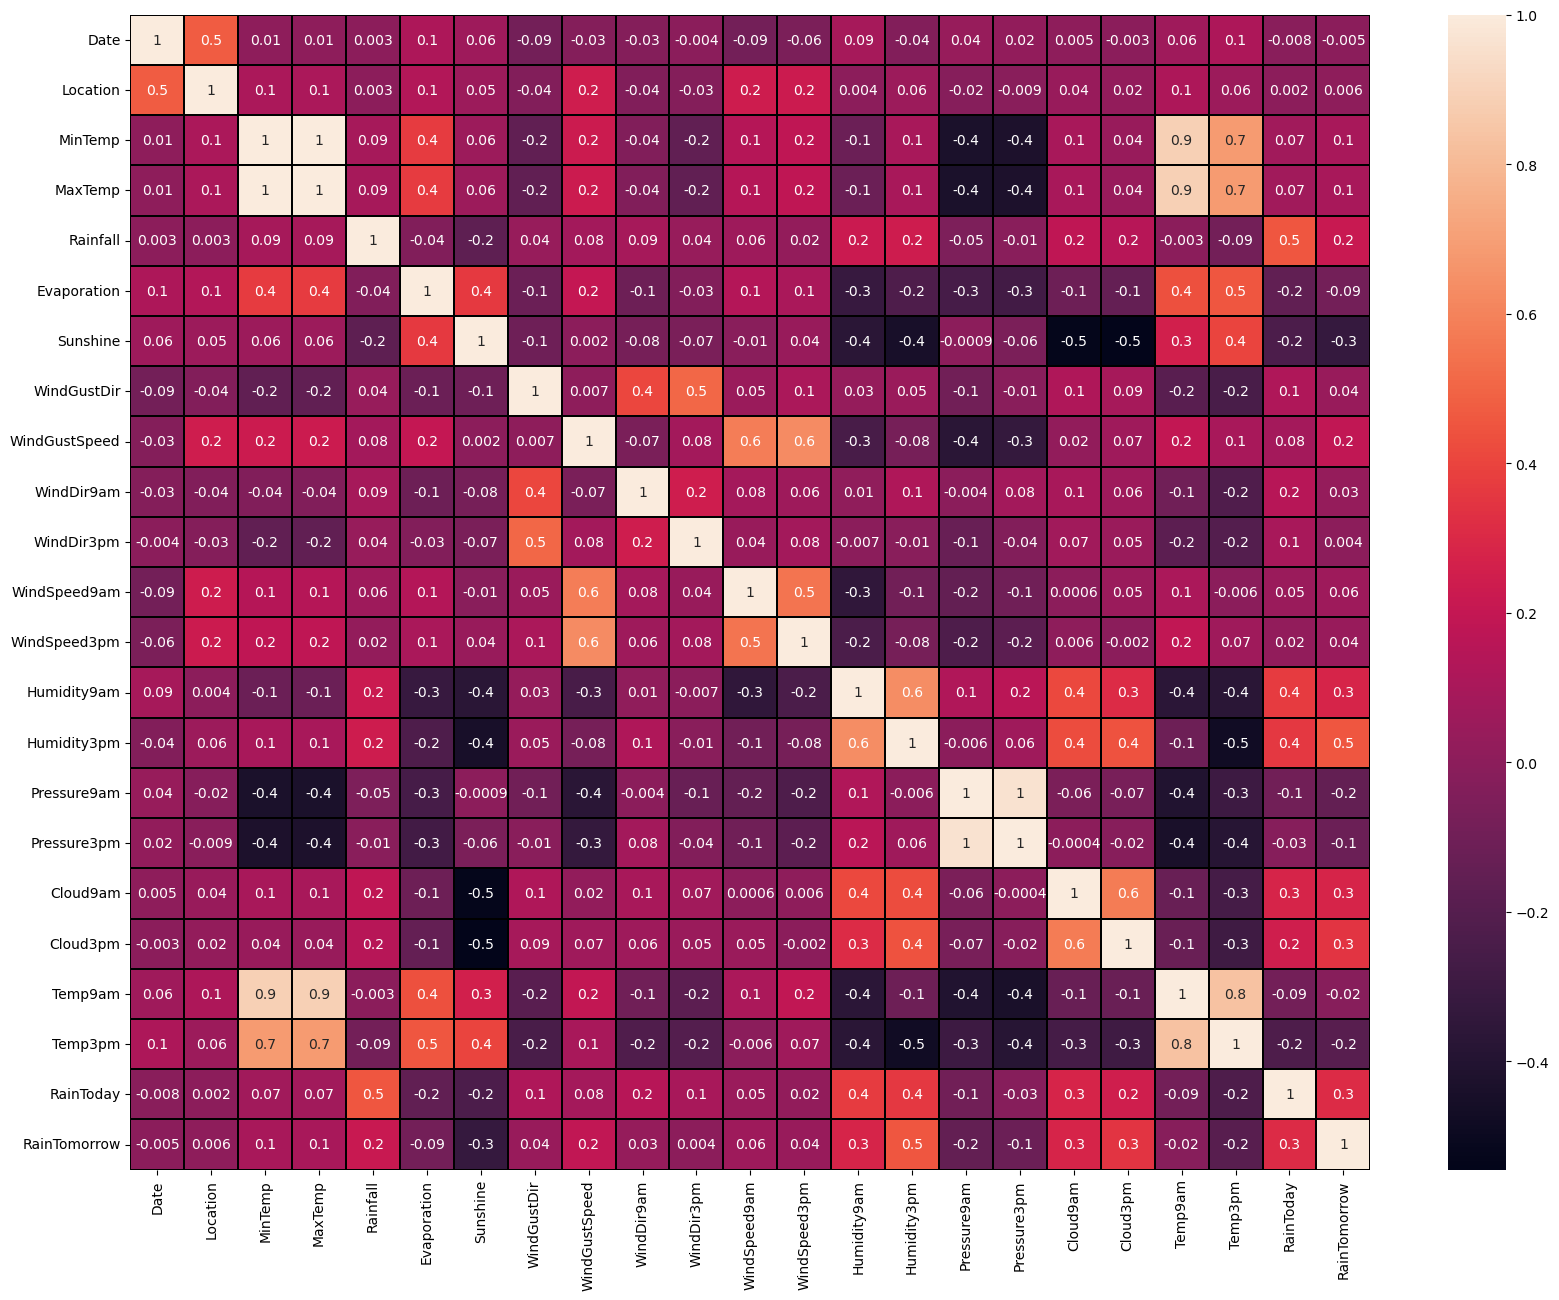

In [35]:
#visualizing the corelation matrix by using the heaatmap
plt.figure(figsize=(20,15))
sns.heatmap(df1_rain.corr(),linewidth=0.1,fmt='0.1g',linecolor="black",annot=True)
plt.yticks(rotation=0);
plt.show()

##### Comments:
we can drop some of the columns to avoid multicolinearity.. but as the number of coluns are more so we can use PCA method to determine the principal components.. so that multicolinearity can also be avoided

##### #visualizing the corelation with target variable1 (RainTomorrow) using barplot:

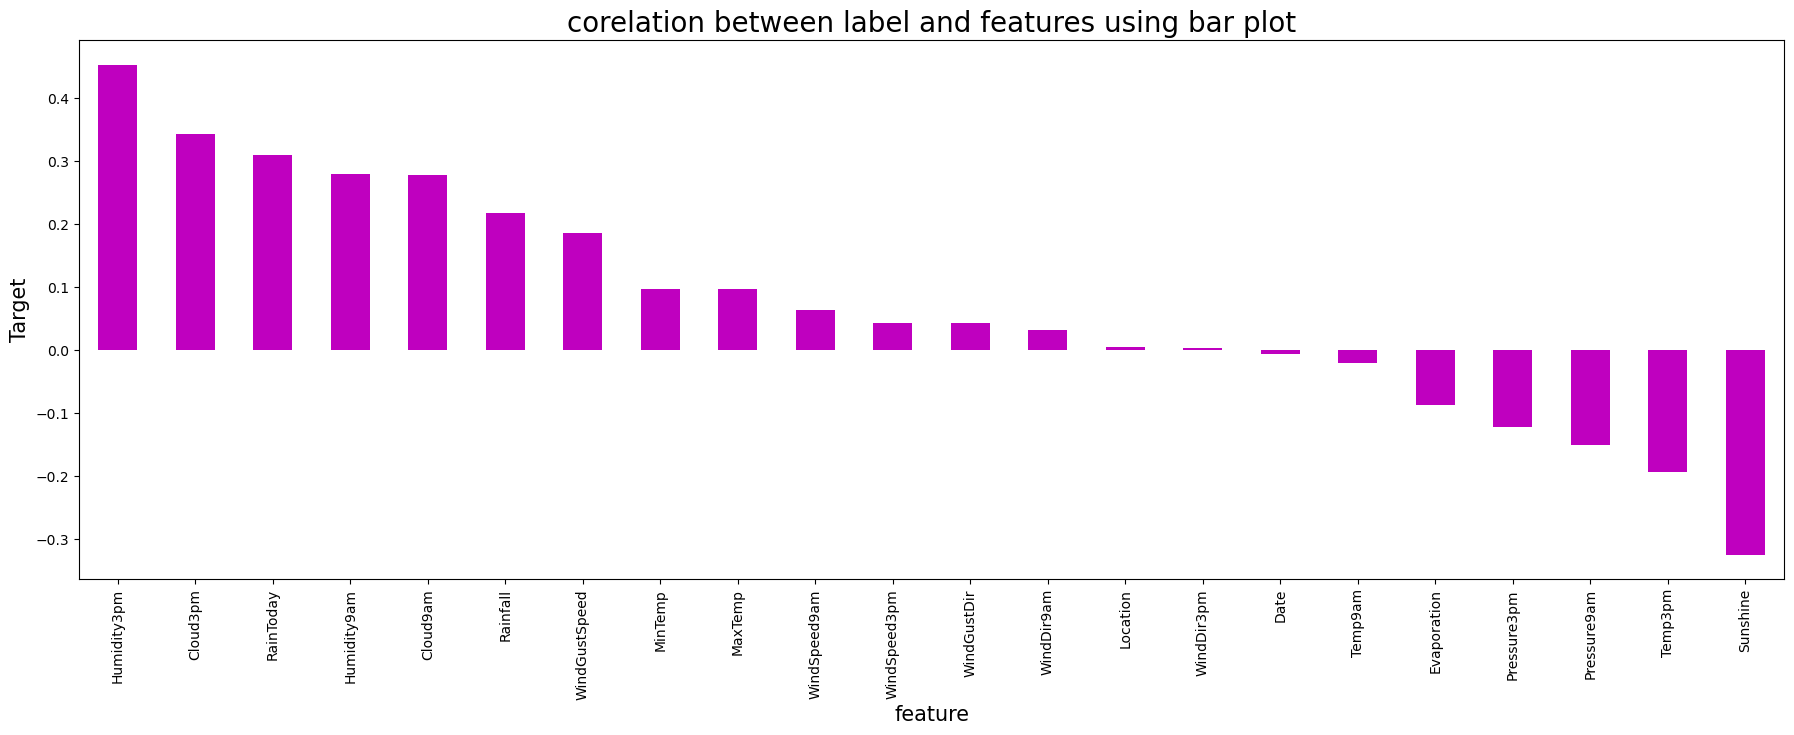

In [36]:
plt.figure(figsize=(22,7))
df1_rain.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


##### visualizing the corelation with target variable1 (RainFall) using barplot:

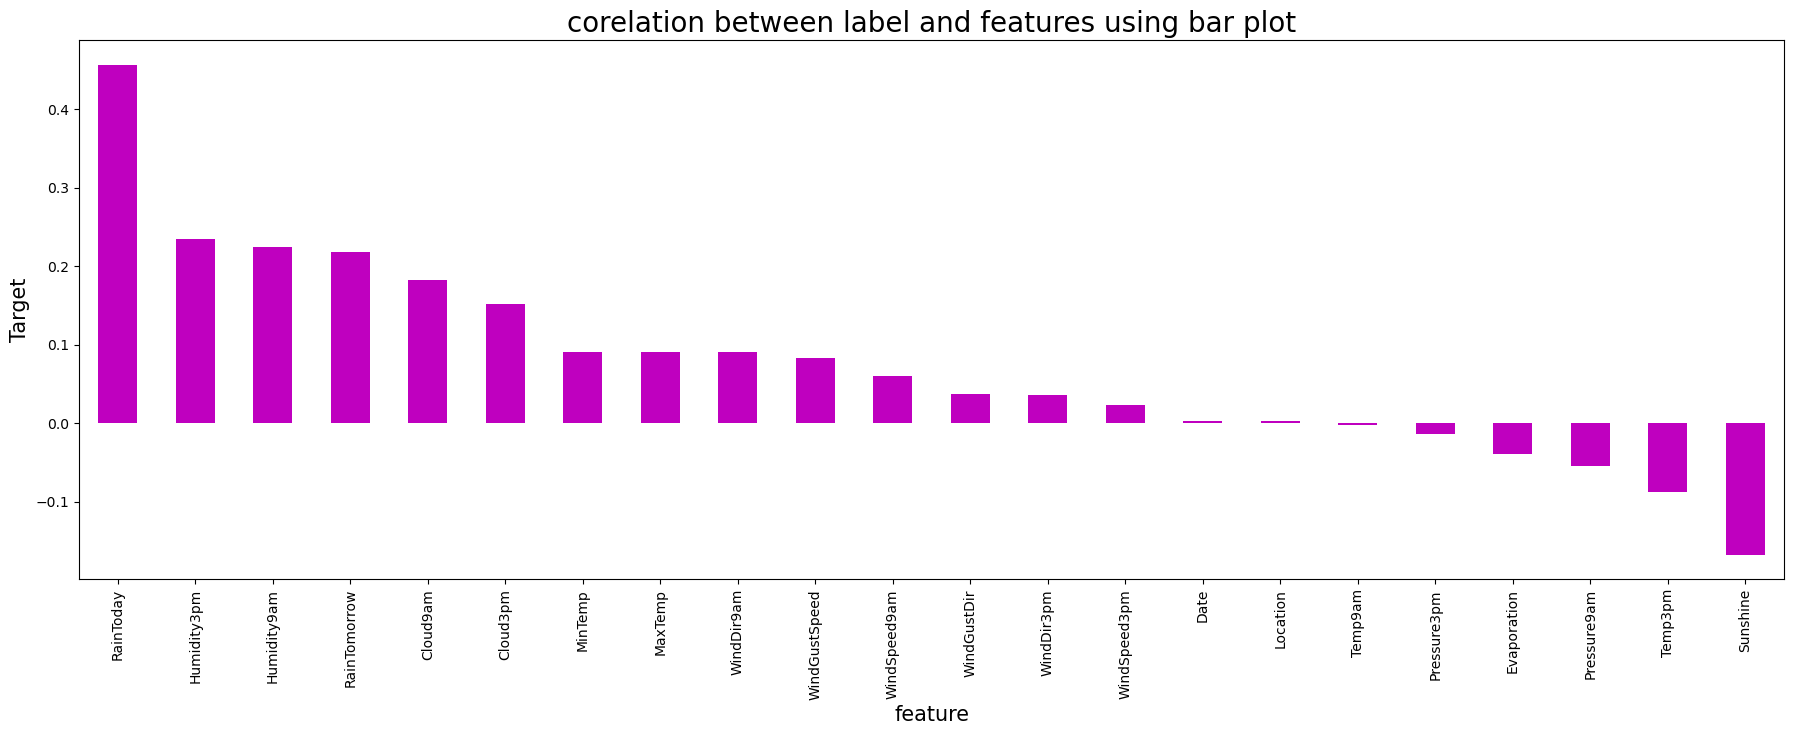

In [37]:
plt.figure(figsize=(22,7))
df1_rain.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color="m")
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("corelation between label and features using bar plot",fontsize=20)
plt.show()


## Variance Inflation Factor( Checking for Multicolinearity)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1_rain.values,i) for i in range(df1_rain.shape[1])]
vif['Features']= df1_rain.columns
vif

VIF       Features
0   4.904054e+00           Date
1   6.687044e+00       Location
2            inf        MinTemp
3            inf        MaxTemp
4   1.395326e+00       Rainfall
5   9.032545e+00    Evaporation
6   1.627033e+01       Sunshine
7   5.366424e+00    WindGustDir
8   2.302383e+01  WindGustSpeed
9   4.769938e+00     WindDir9am
10  6.063065e+00     WindDir3pm
11  6.014794e+00   WindSpeed9am
12  9.504845e+00   WindSpeed3pm
13  7.132668e+01    Humidity9am
14  5.068608e+01    Humidity3pm
15  5.533705e+05    Pressure9am
16  5.529181e+05    Pressure3pm
17  8.715681e+00       Cloud9am
18  8.727858e+00       Cloud3pm
19  1.871947e+02        Temp9am
20  1.878102e+02        Temp3pm
21  2.086151e+00      RainToday
22  1.903126e+00   RainTomorrow

In [39]:
##The "MinTemp" and "Max Temp" column creating high multicolinearity.. so we can drop those columns
df1_rain.drop(['MinTemp','MaxTemp'],axis=1,inplace=True)

# Model building for RainFall Tomorrow Detection (Classification Model)

In [40]:
#separating target variable and input variable

x=df1_rain.drop('RainTomorrow',axis=1)
y=df1_rain['RainTomorrow']

In [41]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Date  Location  Rainfall  Evaporation  Sunshine  WindGustDir  \
0    -1.517500 -1.507825 -0.212069     0.109566 -0.000333     1.228620   
1    -1.516322 -1.507825 -0.271042     0.109566 -0.000333     1.441416   
2    -1.515144 -1.507825 -0.271042     0.109566 -0.000333     1.654213   
3    -1.513965 -1.507825 -0.271042     0.109566 -0.000333    -0.686548   
4    -1.512787 -1.507825 -0.172754     0.109566 -0.000333     1.228620   
...        ...       ...       ...          ...       ...          ...   
8090  2.015868  1.029904 -0.271042     0.109566 -0.000333    -1.537733   
8091  2.017047  1.029904 -0.271042     0.109566 -0.000333    -0.260955   
8092  2.018225  1.029904 -0.271042     0.109566 -0.000333    -0.899344   
8093  2.019403  1.029904 -0.271042     0.109566 -0.000333     0.377434   
8094  2.020581  1.029904 -0.271042     0.109566 -0.000333    -0.899344   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0          0.359197    1.243871    1.400572      0.707728      0.637677   
1          0.359197   -0.282945    1.627116     -0.989405      0.421359   
2          0.515511    1.243871    1.627116      0.601658      0.853995   
3         -1.203942    0.371405   -1.771046     -0.246909     -0.984709   
4          0.124726   -1.373528   -0.185237     -0.671192      0.205041   
...             ...         ...         ...           ...           ...   
8090      -0.656843    0.371405   -1.544502     -0.034767     -0.768391   
8091      -1.360256    0.371405   -1.091414     -0.034767     -0.984709   
8092      -0.187902    0.371405    1.400572     -0.459051     -0.984709   
8093      -0.891314    0.589521   -1.091414     -0.034767     -1.201027   
8094       0.060205   -1.155412   -1.317958      0.389516     -0.119436   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0        0.169919    -1.628086    -1.686076    -1.400080  1.410357  0.002863   
1       -1.463293    -1.462825    -1.201338    -1.281876 -0.000555  0.002863   
2       -1.826229    -1.187390    -1.702791    -1.129899 -0.000555 -1.085016   
3       -1.402804    -1.958609    -0.031280    -0.437560 -0.000555  0.002863   
4        0.835302    -1.022129    -1.167908    -1.585830  0.999417  1.522573   
...           ...          ...          ...          ...       ...       ...   
8090    -1.039868    -1.517912     1.138777     0.828915 -0.000555  0.002863   
8091    -0.737421    -1.683173     0.954911     0.626279 -0.000555  0.002863   
8092    -0.918889    -1.517912     0.537033     0.237893 -0.000555  0.002863   
8093    -1.039868    -1.517912     0.269592     0.187234 -0.644342 -1.085016   
8094    -0.374485    -0.856867     0.403313     0.423643  1.410357  1.522573   

       Temp9am   Temp3pm  RainToday  
0    -0.139997 -0.095216  -0.558373  
1    -0.085945  0.334508  -0.558373  
2     0.598719  0.145430  -0.558373  
3     0.076213  0.712666  -0.558373  
4     0.022160  1.262713  -0.558373  
...        ...       ...        ...  
8090 -1.365185  0.007918  -0.558373  
8091 -1.221045  0.368886  -0.558373  
8092 -0.932766  0.643910  -0.558373  
8093 -0.464312  0.626721  -0.558373  
8094 -0.482329 -0.249917  -0.558373  

[8095 rows x 20 columns]

In [42]:
y.value_counts()

0.0    6199
1.0    1896
Name: RainTomorrow, dtype: int64

### Balancing the Target Variable

In [43]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [44]:
# to balance the target variable data over sampling is performed:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x1,y1=sm.fit_resample(x,y)

In [45]:
y1.value_counts()

0.0    6199
1.0    6199
Name: RainTomorrow, dtype: int64

#### Selecting the Principal components :

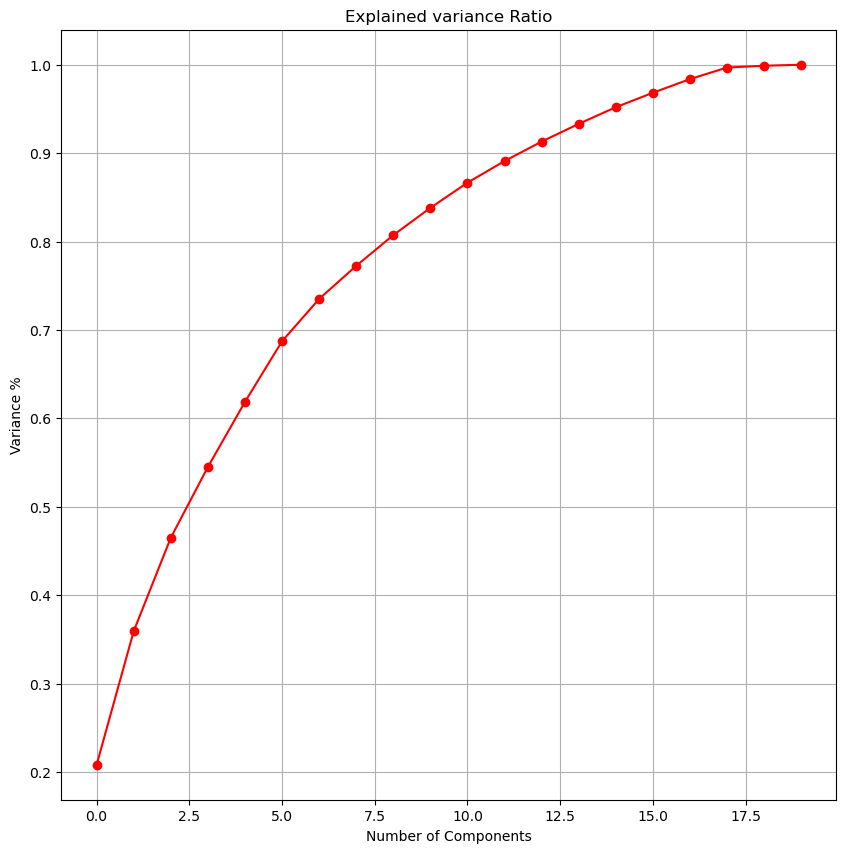

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
#graph to find the principal components
x_pca = pca.fit_transform(x1)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

-> Here we caan see 13 input variable are almost contributing toward 90% of the prediction.. so we can consider those 13 columns as the Principal columns

In [47]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(x1)

In [48]:
x_new=pd.DataFrame(x_new,columns=np.arange(13))

## Model Building (Classification Model)

In [49]:
#finding the best random state:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y1,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum acc_score is",maxAcc, "on random_state",maxRs)        

maximum acc_score is 0.77 on random_state 19


In [51]:
# creating train test split:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9298, 20)
(9298,)
(3100, 20)
(3100,)


In [52]:
#Logistic regression model:
logR=LogisticRegression()
logR.fit(x_train,y_train)
pred_train=logR.predict(x_train)
pred_Lgr=logR.predict(x_test)
print("predicted accuracy",accuracy_score(y_test,pred_Lgr))
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(confusion_matrix(y_test,pred_Lgr))
print(classification_report(y_test,pred_Lgr))


predicted accuracy 0.7935483870967742
accuracy score of original y_test data 0.7707033770703378
[[1299  285]
 [ 355 1161]]
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      1584
         1.0       0.80      0.77      0.78      1516

    accuracy                           0.79      3100
   macro avg       0.79      0.79      0.79      3100
weighted avg       0.79      0.79      0.79      3100



In [53]:
#DecissionTreeClassifier:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
pred_train=dtc.predict(x_train)
print("accuracy score of original y_test data",accuracy_score(y_train,pred_train))
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score of original y_test data 1.0
0.8712903225806452
[[1374  210]
 [ 189 1327]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1584
         1.0       0.86      0.88      0.87      1516

    accuracy                           0.87      3100
   macro avg       0.87      0.87      0.87      3100
weighted avg       0.87      0.87      0.87      3100



In [54]:
#RandomForestClassifier:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))


0.9416129032258065
[[1491   93]
 [  88 1428]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      1584
         1.0       0.94      0.94      0.94      1516

    accuracy                           0.94      3100
   macro avg       0.94      0.94      0.94      3100
weighted avg       0.94      0.94      0.94      3100



In [55]:
#KNeighborsClassifier:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))


0.8696774193548387
[[1251  333]
 [  71 1445]]
              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      1584
         1.0       0.81      0.95      0.88      1516

    accuracy                           0.87      3100
   macro avg       0.88      0.87      0.87      3100
weighted avg       0.88      0.87      0.87      3100



In [56]:
#GaussianNB:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))


0.7587096774193548
[[1295  289]
 [ 459 1057]]
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78      1584
         1.0       0.79      0.70      0.74      1516

    accuracy                           0.76      3100
   macro avg       0.76      0.76      0.76      3100
weighted avg       0.76      0.76      0.76      3100



## Cross Validating the Models:

In [57]:
score_LR=cross_val_score(logR,x_new,y1)             # cross validation score for logistic regression
print(score_LR)
print(score_LR.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_Lgr)-(score_LR.mean()))

[0.71653226 0.64959677 0.62540323 0.72972973 0.80032271]
0.7043169397129436
diff b/w accuracy score and cross validation score is: 0.0892314473838306


In [58]:
score_dtc=cross_val_score(dtc,x_new,y1)           #cross validation score of dtc
print(score_dtc)
print(score_dtc.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_dtc)-(score_dtc.mean()))

[0.71370968 0.72056452 0.84919355 0.85356999 0.75272287]
0.7779521203919375
diff b/w accuracy score and cross validation score is: 0.0933382021887077


In [59]:
score_RFC=cross_val_score(RFC,x_new,y1)                           #cross validation score of RandomForest
print(score_RFC)
print(score_RFC.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_RFC)-(score_RFC.mean()))

[0.72419355 0.73427419 0.86008065 0.8914885  0.86486486]
0.8149803510780881
diff b/w accuracy score and cross validation score is: 0.1266325521477184


In [60]:
score_knn=cross_val_score(knn,x_new,y1)                           #cross validation score of knn
print(score_knn)
print(score_knn.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_knn)-(score_knn.mean()))

[0.68669355 0.63629032 0.75685484 0.79346511 0.74586527]
0.723833816965738
diff b/w accuracy score and cross validation score is: 0.14584360238910066


In [61]:
score_gnb=cross_val_score(gnb,x_new,y1)                           #cross validation score of GaussianNB
print(score_gnb)
print(score_gnb.mean())
print("diff b/w accuracy score and cross validation score is:",accuracy_score(y_test,pred_gnb)-(score_gnb.mean()))

[0.64717742 0.64879032 0.59798387 0.7063332  0.77531263]
0.6751194875665266
diff b/w accuracy score and cross validation score is: 0.08359018985282818


###### By varifying the accuracy score and the cross validation score we can conclude that the Random Forest Classifier is predicting goog for the given problem statement

# Hyperparameter Tuning of Random Forest Classifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [65]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 100}

In [66]:
model_RainT=RandomForestClassifier(bootstrap=True,criterion='entropy', max_depth= 50, max_features='auto',n_estimators= 100)

# Final Model

In [67]:
model_RainT.fit(x_train,y_train)
pred=model_RainT.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.74193548387096


### The Final model Providing 93.74% accuracy

In [68]:
import joblib
joblib.dump(model_RainT,'Tomorrow RainFall Prediction analysis')


['Tomorrow RainFall Prediction analysis']

In [69]:
RFC_RainT=joblib.load('Tomorrow RainFall Prediction analysis')
predictionM=RFC_RainT.predict(x_test)
predictionM

array([0., 0., 0., ..., 1., 0., 0.])

In [70]:
a=np.array(y_test)
DF_RainT=pd.DataFrame()
DF_RainT['predicted']=predictionM
DF_RainT['original']=a
DF_RainT

predicted  original
0           0.0       0.0
1           0.0       0.0
2           0.0       0.0
3           1.0       1.0
4           1.0       1.0
...         ...       ...
3095        0.0       0.0
3096        1.0       1.0
3097        1.0       1.0
3098        0.0       0.0
3099        0.0       0.0

[3100 rows x 2 columns]

## Model Building for Amount Of RainFall (Regression Model):

In [71]:
df2_rain=df1_rain.copy()
df2_rain

Date  Location  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        0.0       1.0       0.6     5.389395  7.632205         13.0   
1        1.0       1.0       0.0     5.389395  7.632205         14.0   
2        2.0       1.0       0.0     5.389395  7.632205         15.0   
3        3.0       1.0       0.0     5.389395  7.632205          4.0   
4        4.0       1.0       1.0     5.389395  7.632205         13.0   
...      ...       ...       ...          ...       ...          ...   
8420  2999.0       9.0       0.0     5.389395  7.632205          0.0   
8421  3000.0       9.0       0.0     5.389395  7.632205          6.0   
8422  3001.0       9.0       0.0     5.389395  7.632205          3.0   
8423  3002.0       9.0       0.0     5.389395  7.632205          9.0   
8424  3003.0       9.0       0.0     5.389395  7.632205          3.0   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0         44.000000        13.0        14.0          20.0  ...         71.0   
1         44.000000         6.0        15.0           4.0  ...         44.0   
2         46.000000        13.0        15.0          19.0  ...         38.0   
3         24.000000         9.0         0.0          11.0  ...         45.0   
4         41.000000         1.0         7.0           7.0  ...         82.0   
...             ...         ...         ...           ...  ...          ...   
8420      31.000000         9.0         1.0          13.0  ...         51.0   
8421      22.000000         9.0         3.0          13.0  ...         56.0   
8422      37.000000         9.0        14.0           9.0  ...         53.0   
8423      28.000000        10.0         3.0          13.0  ...         51.0   
8424      40.174469         2.0         2.0          17.0  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1            25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2            30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3            16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4            33.0       1010.8       1006.0  7.000000  8.000000     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3  4.566622  4.503183     10.1   
8421         21.0       1023.5       1019.1  4.566622  4.503183     10.9   
8422         24.0       1021.0       1016.8  4.566622  4.503183     12.5   
8423         24.0       1019.4       1016.5  3.000000  2.000000     15.1   
8424         36.0       1020.2       1017.9  8.000000  8.000000     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8        0.0           0.0  
1        24.3        0.0           0.0  
2        23.2        0.0           0.0  
3        26.5        0.0           0.0  
4        29.7        0.0           0.0  
...       ...        ...           ...  
8420     22.4        0.0           0.0  
8421     24.5        0.0           0.0  
8422     26.1        0.0           0.0  
8423     26.0        0.0           0.0  
8424     20.9        0.0           0.0  

[8095 rows x 21 columns]

In [72]:
#separating target variable and input variable

x2=df2_rain.drop('Rainfall',axis=1)
y2=df2_rain['Rainfall']

In [73]:
# feature scaling using standard scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x2=pd.DataFrame(scaler.fit_transform(x2),columns=x2.columns)
x2

Date  Location  Evaporation  Sunshine  WindGustDir  WindGustSpeed  \
0    -1.517500 -1.507825     0.109566 -0.000333     1.228620       0.359197   
1    -1.516322 -1.507825     0.109566 -0.000333     1.441416       0.359197   
2    -1.515144 -1.507825     0.109566 -0.000333     1.654213       0.515511   
3    -1.513965 -1.507825     0.109566 -0.000333    -0.686548      -1.203942   
4    -1.512787 -1.507825     0.109566 -0.000333     1.228620       0.124726   
...        ...       ...          ...       ...          ...            ...   
8090  2.015868  1.029904     0.109566 -0.000333    -1.537733      -0.656843   
8091  2.017047  1.029904     0.109566 -0.000333    -0.260955      -1.360256   
8092  2.018225  1.029904     0.109566 -0.000333    -0.899344      -0.187902   
8093  2.019403  1.029904     0.109566 -0.000333     0.377434      -0.891314   
8094  2.020581  1.029904     0.109566 -0.000333    -0.899344       0.060205   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       1.243871    1.400572      0.707728      0.637677     0.169919   
1      -0.282945    1.627116     -0.989405      0.421359    -1.463293   
2       1.243871    1.627116      0.601658      0.853995    -1.826229   
3       0.371405   -1.771046     -0.246909     -0.984709    -1.402804   
4      -1.373528   -0.185237     -0.671192      0.205041     0.835302   
...          ...         ...           ...           ...          ...   
8090    0.371405   -1.544502     -0.034767     -0.768391    -1.039868   
8091    0.371405   -1.091414     -0.034767     -0.984709    -0.737421   
8092    0.371405    1.400572     -0.459051     -0.984709    -0.918889   
8093    0.589521   -1.091414     -0.034767     -1.201027    -1.039868   
8094   -1.155412   -1.317958      0.389516     -0.119436    -0.374485   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.628086    -1.686076    -1.400080  1.410357  0.002863 -0.139997   
1       -1.462825    -1.201338    -1.281876 -0.000555  0.002863 -0.085945   
2       -1.187390    -1.702791    -1.129899 -0.000555 -1.085016  0.598719   
3       -1.958609    -0.031280    -0.437560 -0.000555  0.002863  0.076213   
4       -1.022129    -1.167908    -1.585830  0.999417  1.522573  0.022160   
...           ...          ...          ...       ...       ...       ...   
8090    -1.517912     1.138777     0.828915 -0.000555  0.002863 -1.365185   
8091    -1.683173     0.954911     0.626279 -0.000555  0.002863 -1.221045   
8092    -1.517912     0.537033     0.237893 -0.000555  0.002863 -0.932766   
8093    -1.517912     0.269592     0.187234 -0.644342 -1.085016 -0.464312   
8094    -0.856867     0.403313     0.423643  1.410357  1.522573 -0.482329   

       Temp3pm  RainToday  RainTomorrow  
0    -0.095216  -0.558373     -0.553042  
1     0.334508  -0.558373     -0.553042  
2     0.145430  -0.558373     -0.553042  
3     0.712666  -0.558373     -0.553042  
4     1.262713  -0.558373     -0.553042  
...        ...        ...           ...  
8090  0.007918  -0.558373     -0.553042  
8091  0.368886  -0.558373     -0.553042  
8092  0.643910  -0.558373     -0.553042  
8093  0.626721  -0.558373     -0.553042  
8094 -0.249917  -0.558373     -0.553042  

[8095 rows x 20 columns]

In [74]:
y2.value_counts()

0.000000      5071
0.200000       390
2.805913       232
0.400000       176
0.600000       115
              ... 
23.800000        1
61.200000        1
128.000000       1
90.000000        1
40.000000        1
Name: Rainfall, Length: 243, dtype: int64

#### Selecting the Principal components :

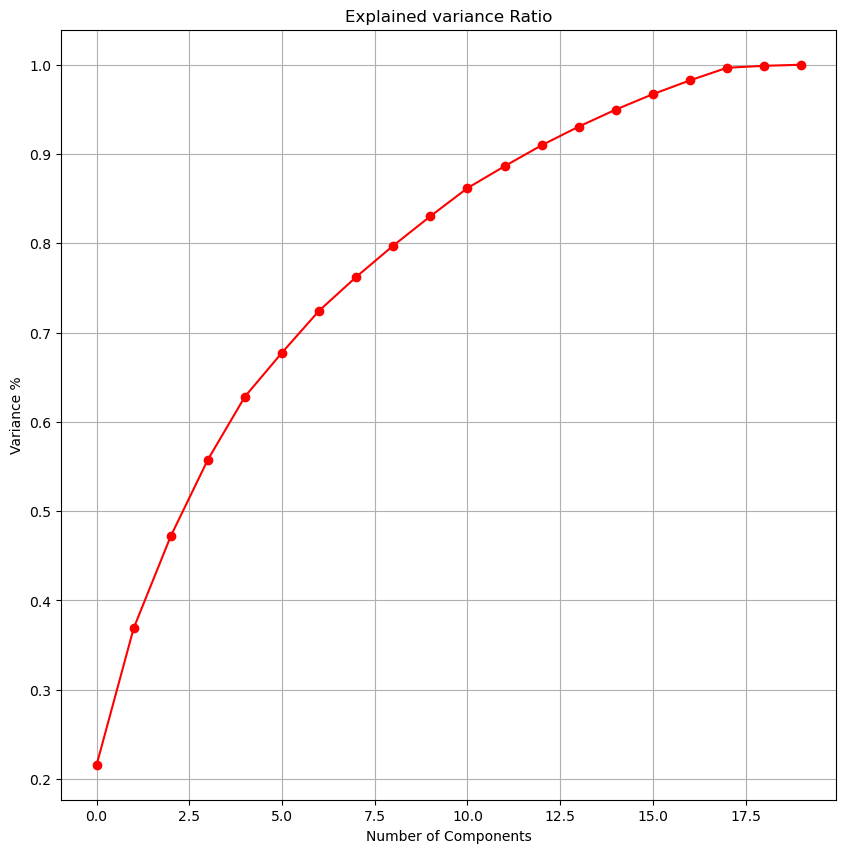

In [75]:
from sklearn.decomposition import PCA
pca = PCA()
#graph to find the principal components
x_pca = pca.fit_transform(x2)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [76]:
pca_new = PCA(n_components=13)
x2_new = pca_new.fit_transform(x2)

In [77]:
x2_new=pd.DataFrame(x2_new,columns=np.arange(13))

## Model Building:

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge


In [79]:
# finding the best random state
maxAcc=0
maxRs=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("maximum r2_score is",maxAcc, "on random_state",maxRs)        

maximum r2_score is 0.4000408473851724 on random_state 308


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.25,random_state=maxRs)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6071, 20)
(6071,)
(2024, 20)
(2024,)


In [81]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_lr=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lr))
print('r2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score: 0.4000408473851724
r2_score on training Data: 20.961822974934073
mean absolute error: 2.8198900553038007
Mean Squared Error:- 28.001797744344227
Root Mean Squrared Error:- 5.29167249027604


In [82]:
# Random Forest model:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score: 0.30399094308182983
R2_score on training Data: 92.14323497990596
mean absolute error: 1.841261155504744
Mean Squared Error:- 32.48471959317968
Root Mean Squrared Error:- 5.699536787597715


In [83]:
# KNN
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('r2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

r2_score: 0.14768816294349885
R2_score on training Data: 46.19321450100784
mean absolute error: 2.1588300829870524
Mean Squared Error:- 39.77981429627211
Root Mean Squrared Error:- 6.307124090762136


In [84]:
# GBR
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('r2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

r2_score: 0.36992347785454494
R2_score on training Data: 71.75904734625253
mean absolute error: 2.059413077632392
Mean Squared Error:- 29.407460924100278
Root Mean Squrared Error:- 5.422864641875203


In [85]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('r2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

r2_score: 0.3798274027616082
R2_score on training Data: 18.175756340677708
mean absolute error: 2.35741723712714
Mean Squared Error:- 28.94521661811033
Root Mean Squrared Error:- 5.380075893341127


In [86]:
#Ridge:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
pred_train=ridge.predict(x_train)
print('r2_score:',r2_score(y_test,pred_ridge))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_ridge))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

r2_score: 0.40007612240165913
R2_score on training Data: 20.961820354597403
mean absolute error: 2.819542249737549
Mean Squared Error:- 28.000151359131525
Root Mean Squrared Error:- 5.2915169242034485


In [87]:
#Decision Tree:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

r2_score: -1.0095143590430866
R2_score on training Data: 100.0
mean absolute error: 1.9747417972720758
Mean Squared Error:- 93.78974285338597
Root Mean Squrared Error:- 9.684510460182588


In [88]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_svr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_svr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_svr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

r2_score: 0.32190611286576787
R2_score on training Data: 15.792392558652136
mean absolute error: 1.7723233346228344
Mean Squared Error:- 31.64856773407556
Root Mean Squrared Error:- 5.625705976504243


In [89]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [90]:
from xgboost import XGBRegressor
xgbr=model = XGBRegressor()
xgbr.fit(x_train,y_train)
pred_xgbr=xgbr.predict(x_test)
pred_train=xgbr.predict(x_train)
print('r2_score:',r2_score(y_test,pred_xgbr))
print('R2_score on training Data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_xgbr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_xgbr))
print("Root Mean Squrared Error:-",np.sqrt(mean_squared_error(y_test,pred_xgbr)))

r2_score: 0.049925596163439834
R2_score on training Data: 99.21881578582608
mean absolute error: 1.994521575477224
Mean Squared Error:- 44.342670967450594
Root Mean Squrared Error:- 6.659029281167833


## Cross Validating the models:

In [91]:
# cross validation of the model:
from sklearn.model_selection import cross_val_score

In [92]:
scoreLR=cross_val_score(LR,x2_new,y2,cv=5,scoring='r2')             #CROSS VALIDATION FOR LINEAR REGRESSOR
print(scoreLR)
print(scoreLR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lr)-scoreLR.mean())*100)

[0.1751311  0.18818321 0.26338459 0.24792429 0.34448988]
0.2438226140026118
difference between r2 score and cross validation score is: 15.621823338256064


In [93]:
scoreRFR=cross_val_score(RFR,x2_new,y2,cv=5,scoring='r2')        #CROSS VALIDATION FOR RANDOM FOREST
print(scoreRFR)
print(scoreRFR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_RFR)-scoreRFR.mean())*100)

[0.15326654 0.44281924 0.69045058 0.28131729 0.43323405]
0.4002175405164041
difference between r2 score and cross validation score is: -9.62265974345743


In [94]:
scoreknn=cross_val_score(knn,x2_new,y2,cv=5,scoring='r2')            # CROSS VALIDATION FOR KNN
print(scoreknn)
print(scoreknn.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_knn)-scoreknn.mean())*100)

[0.12858254 0.24867725 0.35127612 0.06114538 0.07098628]
0.17213351277331748
difference between r2 score and cross validation score is: -2.4445349829818634


In [95]:
scoreGBR=cross_val_score(GBR,x2_new,y2,cv=5,scoring='r2')             #cross validation for gbr
print(scoreGBR)
print(scoreGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_GBR)-scoreGBR.mean())*100)

[0.13460709 0.39964905 0.50791136 0.09922396 0.48993167]
0.32626462598694744
difference between r2 score and cross validation score is: 4.3658851867597495


In [96]:
scoreL=cross_val_score(lasso,x2_new,y2,cv=5,scoring='r2')            #cross validation for lasso
print(scoreL) 
print(scoreL.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_lasso)-scoreL.mean())*100)

[0.11374487 0.13338314 0.17613602 0.18939404 0.2981711 ]
0.18216583226484134
difference between r2 score and cross validation score is: 19.766157049676686


In [97]:
scoreR=cross_val_score(ridge,x2_new,y2,cv=5,scoring='r2')          #cross validation for ridge
print(scoreR)
print(scoreR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_ridge)-scoreR.mean())*100)

[0.17512539 0.1881831  0.26338397 0.24793577 0.3445018 ]
0.24382600669062376
difference between r2 score and cross validation score is: 15.625011571103537


In [98]:
scoreSVR=cross_val_score(svr,x2_new,y2,cv=5,scoring='r2')             #cross validation for svr
print(scoreSVR)
print(scoreSVR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_svr)-scoreSVR.mean())*100)

[0.11235842 0.14657386 0.18220752 0.19722706 0.27006621]
0.1816866136305597
difference between r2 score and cross validation score is: 14.021949923520815


In [99]:
scoreDTR=cross_val_score(dtr,x2_new,y2,cv=5,scoring='r2')             #cross validation for dtr
print(scoreDTR)
print(scoreDTR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_dtr)-scoreDTR.mean())*100)

[-0.18870571  0.35305703 -0.41092088 -1.84372604 -0.7305726 ]
-0.5641736408089484
difference between r2 score and cross validation score is: -44.534071823413825


In [100]:
scoreXGBR=cross_val_score(xgbr,x2_new,y2,cv=5,scoring='r2')             #cross validation for xgbr
print(scoreXGBR)
print(scoreXGBR.mean())
print("difference between r2 score and cross validation score is:",(r2_score(y_test,pred_xgbr)-scoreXGBR.mean())*100)

[ 0.13004172  0.46221412  0.38937968 -0.01385531 -0.1019902 ]
0.17315800244060991
difference between r2 score and cross validation score is: -12.323240627717007


##### By varifying the r2 score and cross validation score we can conclude that Random Forest Regressor performs better for this problem statement

##  Hyperparameter Tuning Random forest Regressor:

In [101]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 200, 300]
    }

GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=4)
GCV.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [8, 10],
                         'n_estimators': [100, 200, 300]})

In [102]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [103]:
model_rain2=RandomForestRegressor(bootstrap=True,max_depth=100,max_features=3,min_samples_leaf=3,min_samples_split= 8,n_estimators=300)

## Final Model2

In [104]:
model_rain2.fit(x_train,y_train)
pred=model_rain2.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

56.230410939347394


##### In the final model we are getting 56.23% accuracy

#### Saving the model:

In [107]:
import joblib
joblib.dump(model_rain2,'Amount of RainFall Prediction analysis')


['Amount of RainFall Prediction analysis']

In [108]:
RFC_Rain2=joblib.load('Amount of RainFall Prediction analysis')
predictionM=RFC_Rain2.predict(x_test)
predictionM

array([2.79978551e+00, 1.84642465e+00, 1.32334283e+01, ...,
       8.02221574e-03, 6.24437508e-01, 1.37498352e+00])